In [2]:
import scipy.io as scio
import h5py
import tifffile as tf
from PIL import Image

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import networkx as nx
from networkx.algorithms import community
import powerlaw

from scipy import stats
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from itertools import chain

## Settings and Parameters

In [3]:
region_names = {64: 'MBPED',65: 'MBVL',66: 'MBML',55: 'LH',72: 'SLP',73: 'SIP',74: 'SMP',63: 'CRE',84: 'SCL',59: 'ICL',
                4: 'NO',23: 'EB',26: 'FB',56: 'LAL',79: 'AOTU',75: 'AVLP',76: 'PVLP',77: 'IVLP',60: 'VES',80: 'GOR',82: 'SPS',
                85: 'EPA',67: 'FLA'}
focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]

## path
path ="../result/"

## Generate average G7f network over 20 flies

outpath: /0-LLB/New_data/data_analysis_res_deepcad/Ach-all-flies-stimu/
-------------- period  0  -------------
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230417-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly3-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230428-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230507-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly3-stimu/
---- processing inputpath:  /0-LL

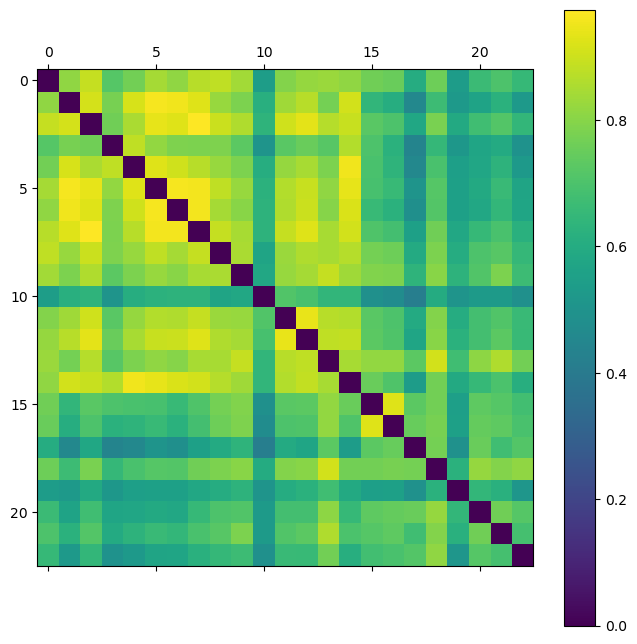

---- Finish saving similarity matrix!
region_records_avg_list: (23, 900)


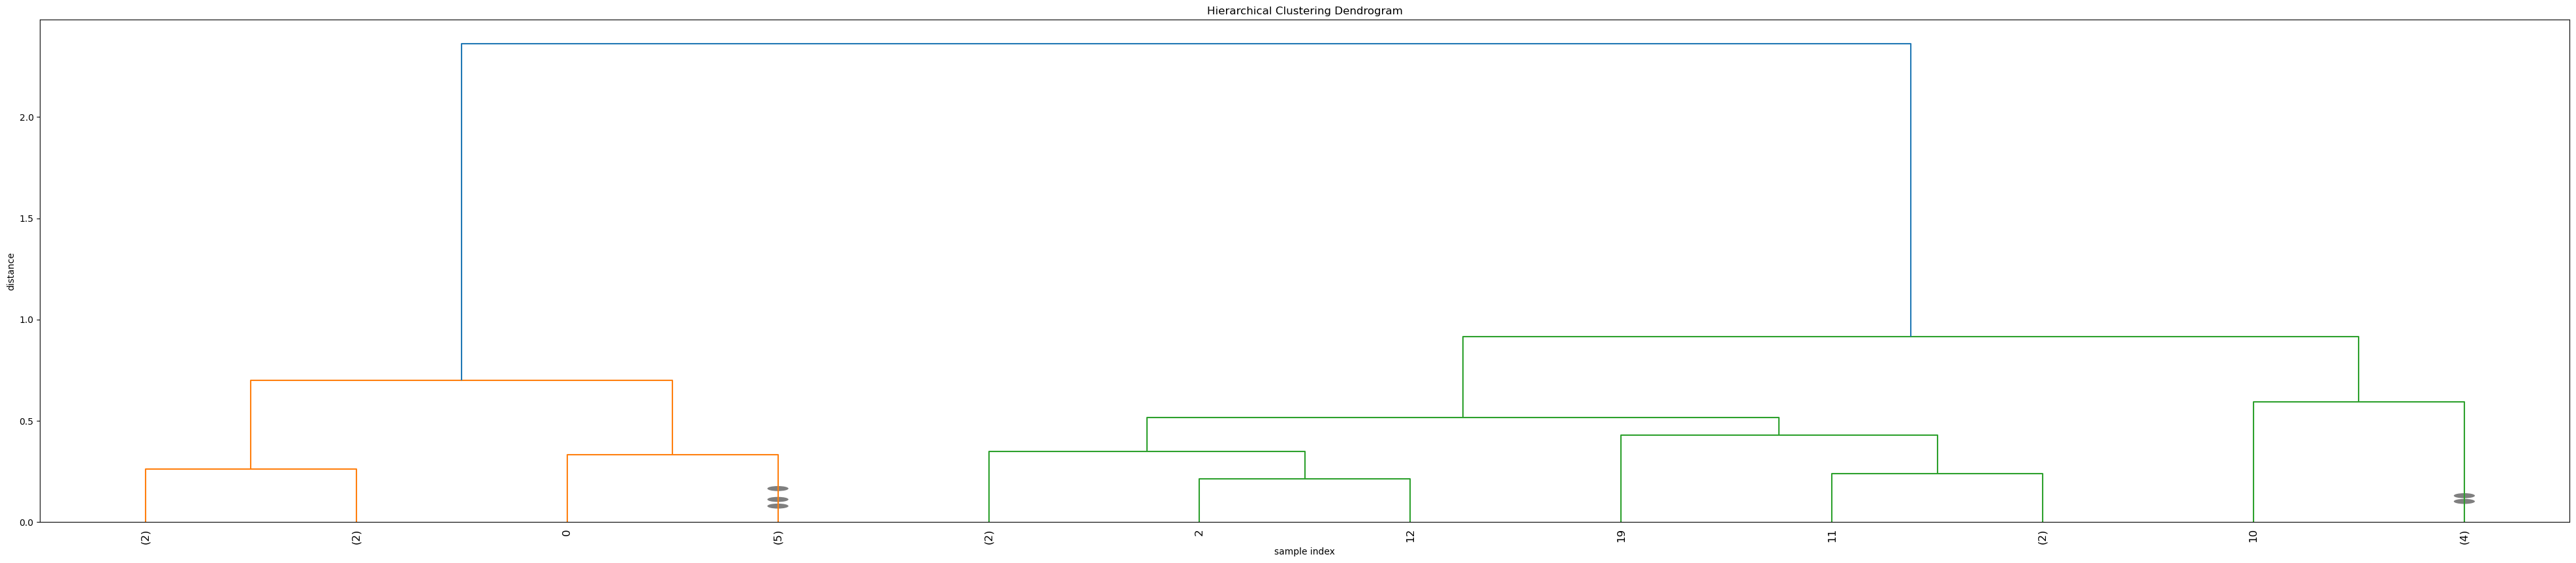

<class 'numpy.ndarray'> 23 [1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 1 1 2 1 1 1]
1 10 [0, 9, 13, 15, 16]
2 13 [1, 2, 3, 4, 5]
hierarchy_idx_list: 23 [0, 9, 13, 15, 16, 17, 18, 20, 21, 22, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 19]
hierarchy_region: 23 [64, 59, 56, 75, 76, 77, 60, 82, 85, 67, 65, 66, 55, 72, 73, 74, 63, 84, 4, 23, 26, 79, 80]
hierarchy_region_name: 23 ['MBPED', 'ICL', 'LAL', 'AVLP', 'PVLP', 'IVLP', 'VES', 'SPS', 'EPA', 'FLA', 'MBVL', 'MBML', 'LH', 'SLP', 'SIP', 'SMP', 'CRE', 'SCL', 'NO', 'EB', 'FB', 'AOTU', 'GOR']
similarity: (23, 23)


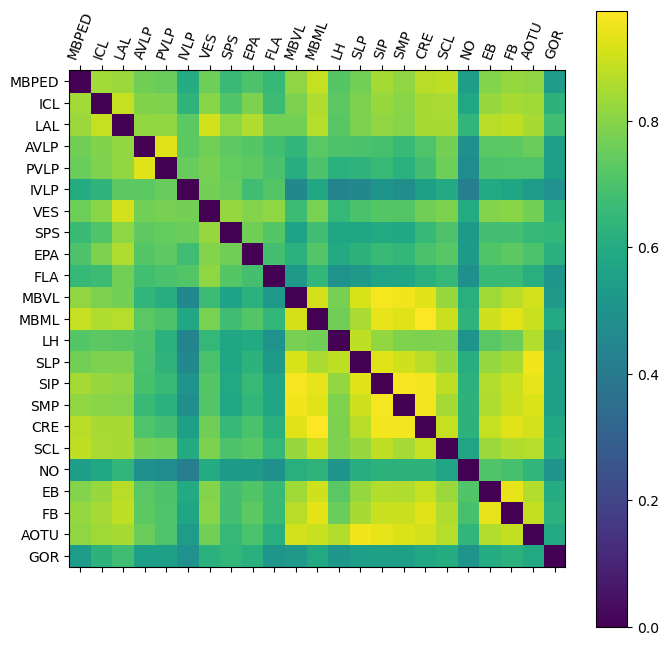

---- Finish saving hierarchy similarity matrix!
-------------- period  1  -------------
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230417-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly3-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230428-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230507-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly3-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis

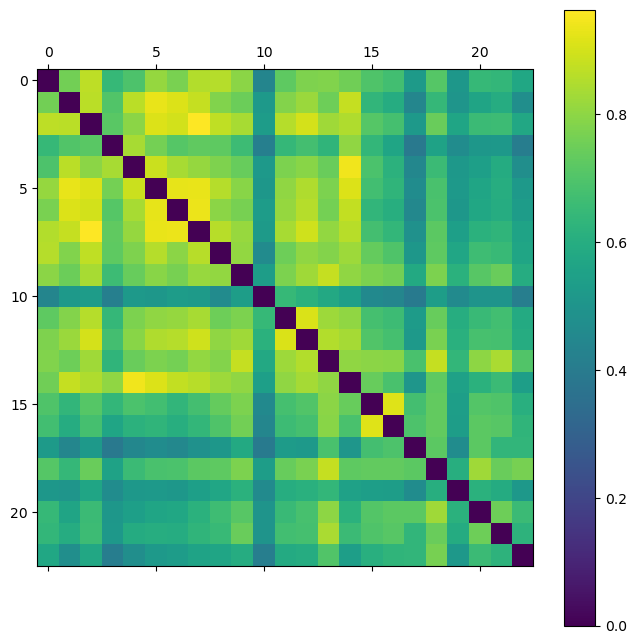

---- Finish saving similarity matrix!
region_records_avg_list: (23, 900)


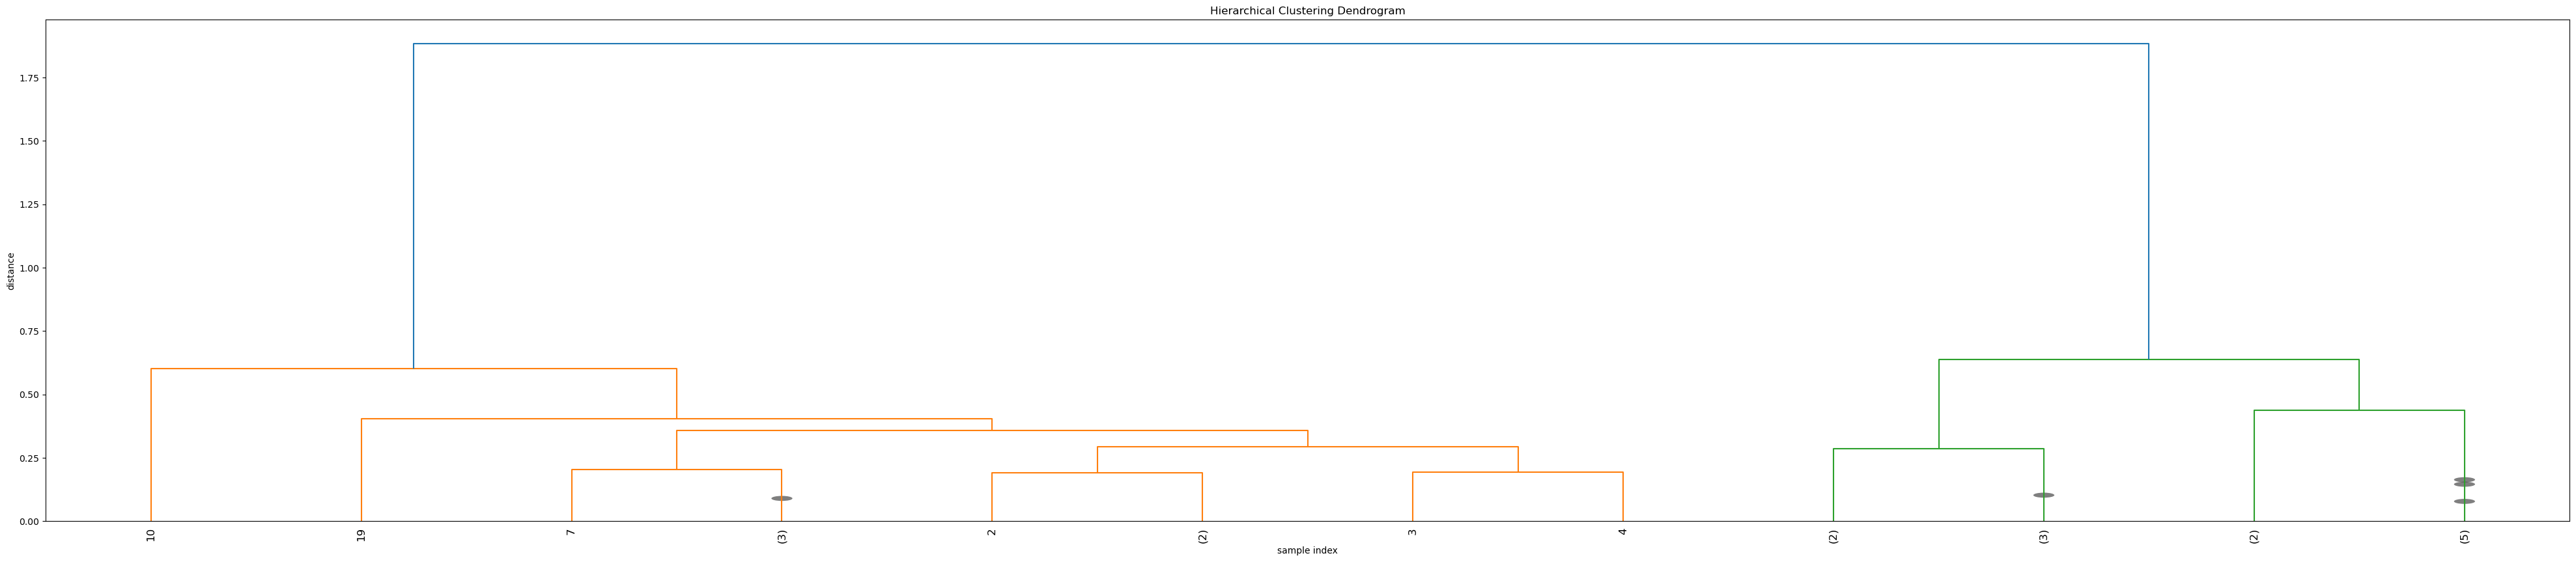

<class 'numpy.ndarray'> 23 [2 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 1 2 2 2]
1 11 [1, 2, 3, 4, 5]
2 12 [0, 8, 9, 13, 14]
hierarchy_idx_list: 23 [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 19, 0, 8, 9, 13, 14, 15, 16, 17, 18, 20, 21, 22]
hierarchy_region: 23 [65, 66, 55, 72, 73, 74, 63, 4, 23, 26, 80, 64, 84, 59, 56, 79, 75, 76, 77, 60, 82, 85, 67]
hierarchy_region_name: 23 ['MBVL', 'MBML', 'LH', 'SLP', 'SIP', 'SMP', 'CRE', 'NO', 'EB', 'FB', 'GOR', 'MBPED', 'SCL', 'ICL', 'LAL', 'AOTU', 'AVLP', 'PVLP', 'IVLP', 'VES', 'SPS', 'EPA', 'FLA']
similarity: (23, 23)


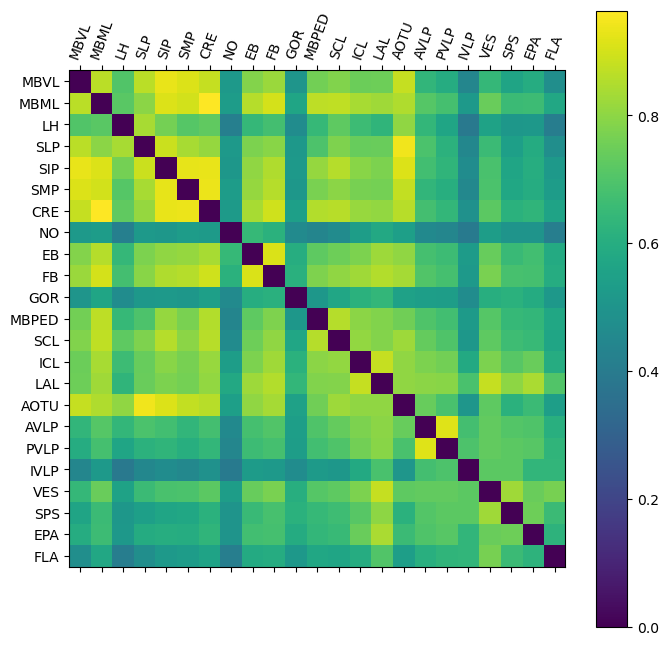

---- Finish saving hierarchy similarity matrix!
-------------- period  2  -------------
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230417-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly3-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230428-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230507-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly3-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis

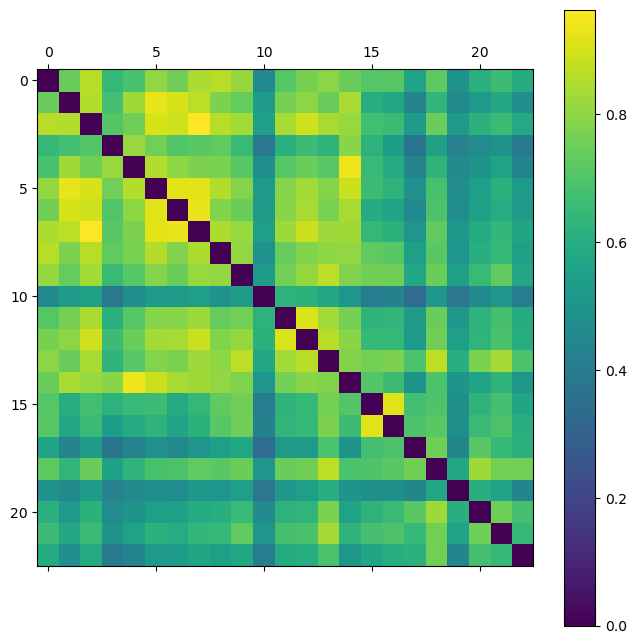

---- Finish saving similarity matrix!
region_records_avg_list: (23, 900)


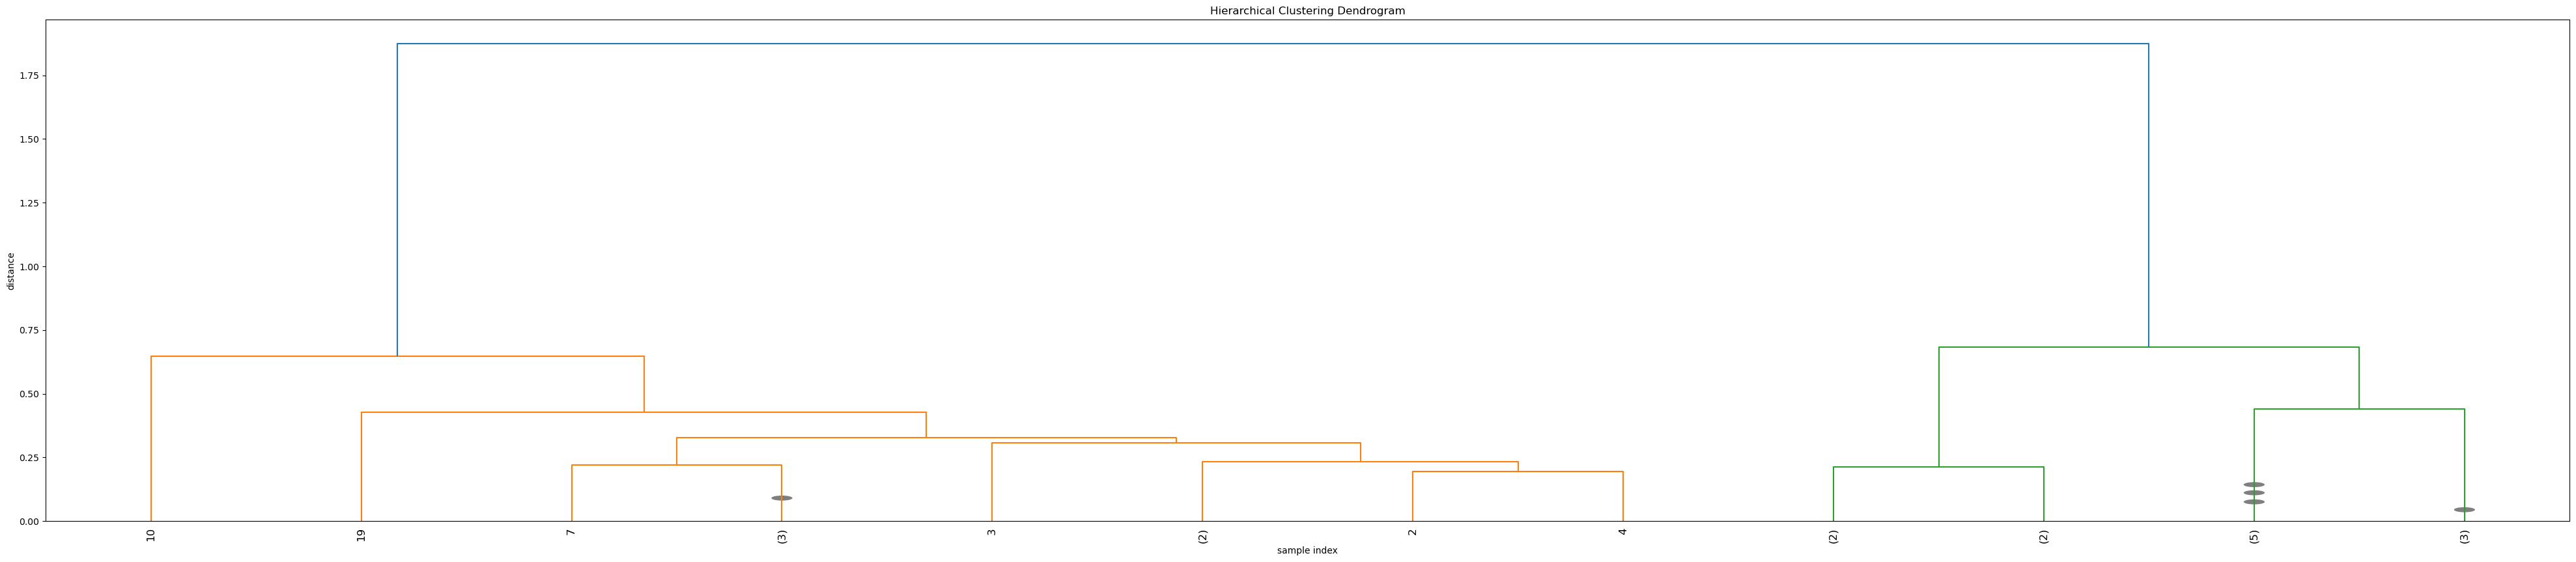

<class 'numpy.ndarray'> 23 [2 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 1 2 2 2]
1 11 [1, 2, 3, 4, 5]
2 12 [0, 8, 9, 13, 14]
hierarchy_idx_list: 23 [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 19, 0, 8, 9, 13, 14, 15, 16, 17, 18, 20, 21, 22]
hierarchy_region: 23 [65, 66, 55, 72, 73, 74, 63, 4, 23, 26, 80, 64, 84, 59, 56, 79, 75, 76, 77, 60, 82, 85, 67]
hierarchy_region_name: 23 ['MBVL', 'MBML', 'LH', 'SLP', 'SIP', 'SMP', 'CRE', 'NO', 'EB', 'FB', 'GOR', 'MBPED', 'SCL', 'ICL', 'LAL', 'AOTU', 'AVLP', 'PVLP', 'IVLP', 'VES', 'SPS', 'EPA', 'FLA']
similarity: (23, 23)


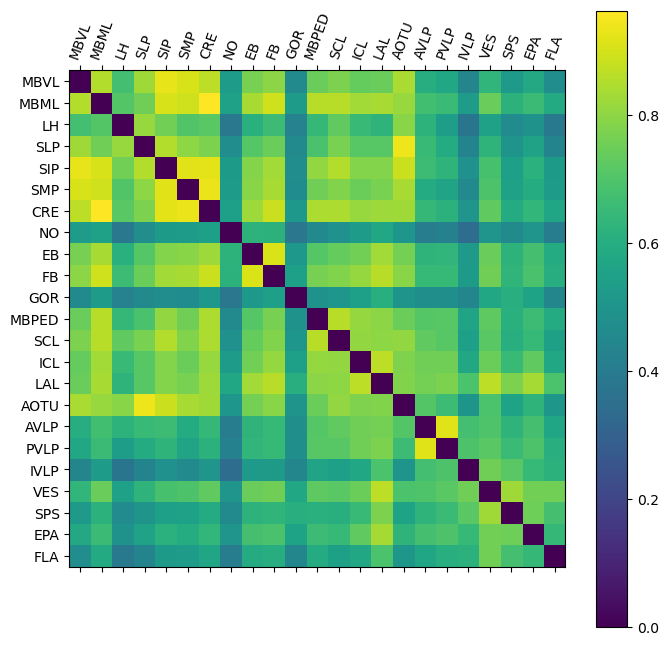

---- Finish saving hierarchy similarity matrix!
-------------- period  3  -------------
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230417-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly3-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230428-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230507-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly1-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly2-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly3-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis

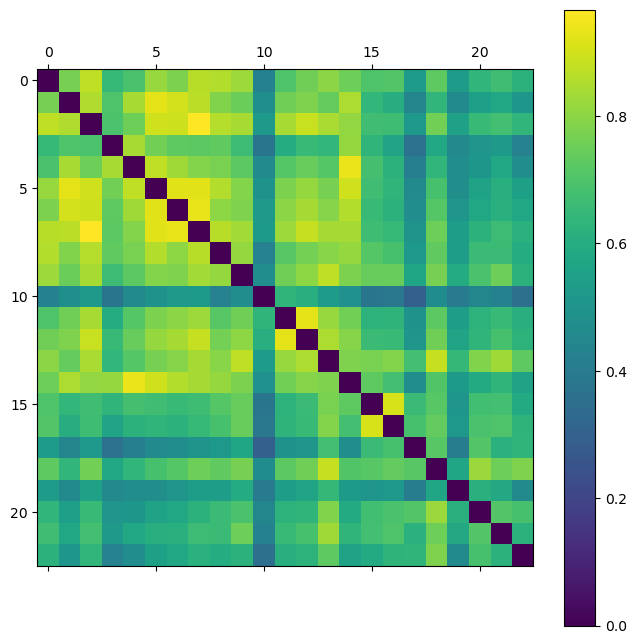

---- Finish saving similarity matrix!
region_records_avg_list: (23, 900)


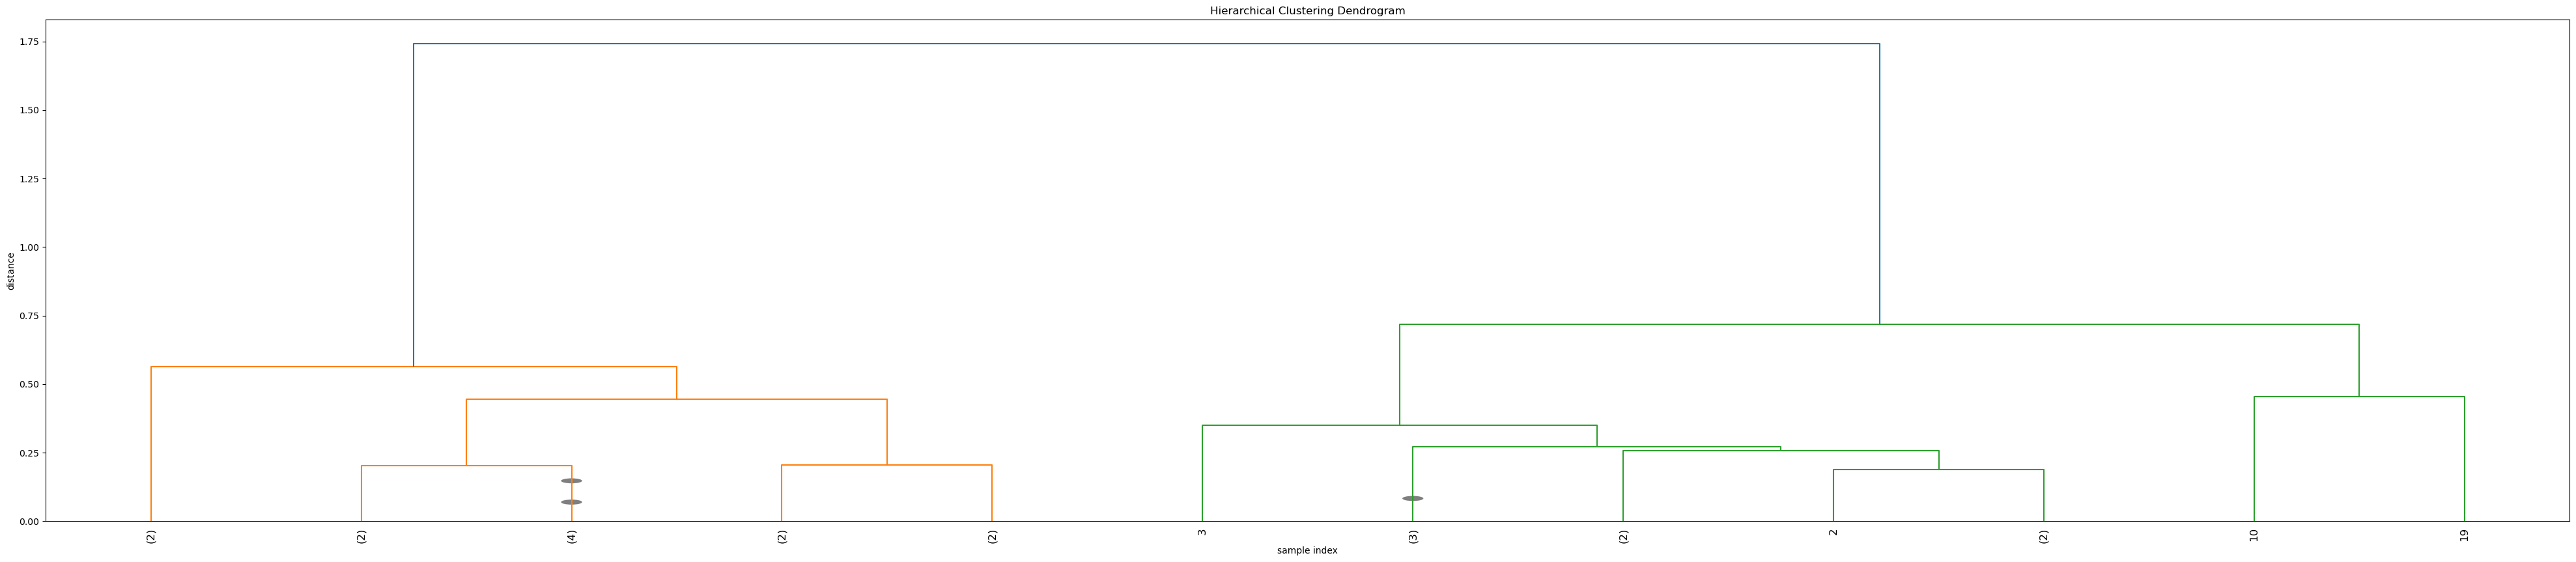

<class 'numpy.ndarray'> 23 [1 2 2 2 2 2 2 2 1 1 2 2 2 1 1 1 1 1 1 2 1 1 1]
1 12 [0, 8, 9, 13, 14]
2 11 [1, 2, 3, 4, 5]
hierarchy_idx_list: 23 [0, 8, 9, 13, 14, 15, 16, 17, 18, 20, 21, 22, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 19]
hierarchy_region: 23 [64, 84, 59, 56, 79, 75, 76, 77, 60, 82, 85, 67, 65, 66, 55, 72, 73, 74, 63, 4, 23, 26, 80]
hierarchy_region_name: 23 ['MBPED', 'SCL', 'ICL', 'LAL', 'AOTU', 'AVLP', 'PVLP', 'IVLP', 'VES', 'SPS', 'EPA', 'FLA', 'MBVL', 'MBML', 'LH', 'SLP', 'SIP', 'SMP', 'CRE', 'NO', 'EB', 'FB', 'GOR']
similarity: (23, 23)


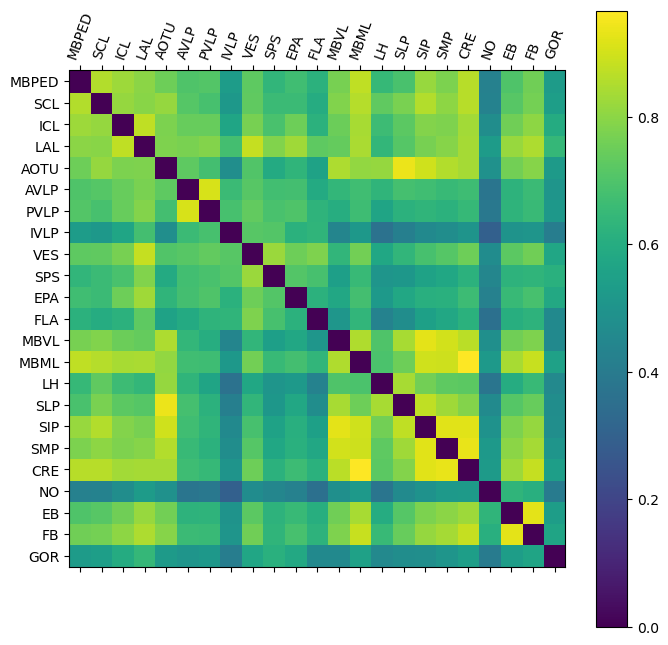

---- Finish saving hierarchy similarity matrix!
END


In [5]:
''' generate average correlation matrix '''

## output path
outpath = path + 'G7f_average_Stim/'
print("outpath:", outpath)

period_cnt = 4
period_trails = 180 / period_cnt
whole_start_timepoint = 3
for period_i in range(period_cnt):
    print('-------------- period ', period_i, ' -------------')

    # initialization
    region_similarity_dict = {}
    n_regions = len(focus_regions_0)
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):   
            region_similarity_dict[(focus_regions_0[i],focus_regions_0[j])] = []
    region_records_avg_dict = {}
    for i in range(n_regions):
        region_records_avg_dict[focus_regions_0[i]] = []

    '''
    process ACh flies
    '''
    
    data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                       '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
    focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]
    focus_regions_1 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # 80,82,
    focus_regions_2 = [64,65,66,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # 55,80,82,

    for fly_idx in data_index_list:
        inputpath = path + 'flies_ACh/Ach-' + fly_idx + '-stimu/'
        print("---- processing inputpath: ", inputpath)

        region_records_avg = []
        focus_regions = []
        if fly_idx == '20230428-fly1' or fly_idx == '20230510-fly1':
            focus_regions = focus_regions_1
        elif fly_idx == '20230507-fly1':
            focus_regions = focus_regions_2
        else:
            focus_regions = focus_regions_0

        for region_idx in focus_regions:  
            ## load record data
            records = np.load(inputpath +'neuron_concat_records/region_' + str(region_idx) +'_neuron_records.npy',allow_pickle=True)

            ## select records for the given time period
            cnt = 45 * period_i + 1 
            frames = 20
            duration = 23
            start_timepoint = whole_start_timepoint
            pre_sti = records[:, start_timepoint : start_timepoint + frames]
            start_timepoint += duration
            len_max = len(records[0])
            while cnt < 45 * (period_i + 1):
                cnt += 1
                pre_sti = np.concatenate((pre_sti,records[:, start_timepoint : start_timepoint + frames]), axis = 1) 
                start_timepoint += duration    

            ## generate average records
            pre_sti_avg = np.mean(pre_sti, axis = 0)

            region_records_avg.append(pre_sti_avg)
            region_records_avg_dict[region_idx].append(pre_sti_avg)
        
        ## calculate correlation
        n_regions_new = len(focus_regions)
        for i in range(n_regions_new - 1):
            for j in range(i + 1, n_regions_new):   
                pearson = pearsonr(region_records_avg[i], region_records_avg[j])
                pair = (focus_regions[i], focus_regions[j])
                region_similarity_dict[pair].append(pearson[0])

    '''
    process 5HT flies
    '''
    data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                       '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                       '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
    focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]
    focus_regions_1 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,85,67] # 82
    focus_regions_2 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # 80,82
    focus_regions_3 = [64,65,66,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67] # 55

    for fly_idx in data_index_list:
        inputpath = path + 'flies_5HT/' + fly_idx + '-stimu/'
        print("---- processing inputpath: ", inputpath)

        region_records_avg = []
        focus_regions = []
        if fly_idx in ["20230429-r5HT1.0-fly1", "20230516-r5HT1.0-fly4"]:
            focus_regions = focus_regions_1
        elif fly_idx in ["20230601-r5HT1.0-fly3", "20230517-r5HT1.0-fly1"]:
            focus_regions = focus_regions_2
        elif fly_idx == "20230601-r5HT1.0-fly1":
            focus_regions = focus_regions_3
        else:
            focus_regions = focus_regions_0

        for region_idx in focus_regions:   
            ## load record data
            records = np.load(inputpath +'neuron_concat_records/region_' + str(region_idx) +'_neuron_records.npy',allow_pickle=True)

            ## select records for the given time period
            cnt = 45 * period_i + 1 
            frames = 20
            duration = 23
            start_timepoint = whole_start_timepoint
            pre_sti = records[:, start_timepoint : start_timepoint + frames]
            start_timepoint += duration
            len_max = len(records[0])
            while cnt < 45 * (period_i + 1):
                cnt += 1
                pre_sti = np.concatenate((pre_sti,records[:, start_timepoint : start_timepoint + frames]), axis = 1) 
                start_timepoint += duration   

            ## generate average records
            pre_sti_avg = np.mean(pre_sti, axis = 0)

            region_records_avg.append(pre_sti_avg)
            region_records_avg_dict[region_idx].append(pre_sti_avg)

        ## calculate correlation
        n_regions_new = len(focus_regions)
        for i in range(n_regions_new - 1):
            for j in range(i + 1, n_regions_new):   
                pearson = pearsonr(region_records_avg[i], region_records_avg[j])
                pair = (focus_regions[i], focus_regions[j])
                region_similarity_dict[pair].append(pearson[0])
    whole_start_timepoint = start_timepoint


    '''
    calculate correlation matrix
    '''
    similarity = np.zeros((n_regions, n_regions))
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):   
            similarity[i,j] = similarity[j,i] = np.mean(region_similarity_dict[(focus_regions_0[i],focus_regions_0[j])])
    np.save(outpath + 'whole_brain_all_regions_similarity_ACH_5HT_preiod' + str(period_i) + '.npy', similarity)
    print("similarity:", similarity.shape)

    figure = plt.figure(figsize=(8,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(similarity, interpolation ='nearest') 
    figure.colorbar(caxes) 
    plt.savefig(outpath + 'whole_brain_all_regions_similarity_ACH_5HT_preiod' + str(period_i) + '.png')
    plt.show()
    print("---- Finish saving similarity matrix!")


    '''
    calculate hierarchy clustering
    '''
    region_records_avg_list = []
    for i in range(n_regions):
        records_avg = np.mean(region_records_avg_dict[focus_regions_0[i]], axis = 0)
        region_records_avg_list.append(records_avg) 
    print("region_records_avg_list:", np.array(region_records_avg_list).shape)
    np.save(outpath + 'whole_brain_all_regions_records_avg_ACH_5HT_preiod' + str(period_i) + '.npy', region_records_avg_list)

    ## clusters
    Z = linkage(region_records_avg_list, 'ward') 
    plt.figure(figsize=(50, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.show()

    k = 2
    clusters = fcluster(Z, k, criterion='maxclust')
    print(type(clusters), len(clusters), clusters)    
    list(enumerate(clusters))
    hierarchy_idx = []
    hierarchy_region = []
    for index_id in range(1,k+1):
        index = [i for i,j in enumerate(clusters) if j == index_id]
        print(index_id, len(index), index[:5])
        hierarchy_idx.append(index)   
        hierarchy_region += list(np.array(focus_regions_0)[index])

    ## new region order
    hierarchy_region_name = []
    for i in hierarchy_region:
        hierarchy_region_name.append(region_names[i])
    hierarchy_idx_list = list(chain(*hierarchy_idx))

    ## calculate hierarchy correlation
    similarity = np.zeros((n_regions, n_regions))
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):   
            pair = (hierarchy_region[i],hierarchy_region[j])
            if pair not in region_similarity_dict.keys():
                pair = (hierarchy_region[j],hierarchy_region[i])
            similarity[i,j] = similarity[j,i] = np.mean(region_similarity_dict[pair])
    print("similarity:", similarity.shape)

    ## plot
    figure = plt.figure(figsize=(8,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(similarity, interpolation ='nearest') 
    figure.colorbar(caxes) 
    plt.xticks(rotation = 70)
    plt.xticks(range(len(hierarchy_region)), hierarchy_region_name)
    plt.yticks(rotation = 0)
    plt.yticks(range(len(hierarchy_region)), hierarchy_region_name)
    plt.savefig(outpath + 'whole_brain_all_regions_similarity_hierarchy_ACH_5HT_preiod' + str(period_i) + '.png')
    plt.show()

    hierarchy_idx_dict = {}
    for k in range(len(hierarchy_idx)):
        hierarchy_idx_dict[k] = hierarchy_idx[k]
    np.save(outpath + 'whole_brain_all_regions_similarity_hierarchy_ACH_5HT_idx_preiod' + str(period_i) + '.npy', hierarchy_idx_dict)
    np.save(outpath + 'whole_brain_all_regions_similarity_hierarchy_ACH_5HT_preiod' + str(period_i) + '.npy', similarity)
    print("---- Finish saving hierarchy similarity matrix!")


print("END")

In [6]:
''' generate average network and communities '''

## parameters
delete_seg = 0
period_cnt = 4

for period_i in range(period_cnt):
    ## load data
    load_path = path + 'G7f_average_Stim/'
    similarity = np.load(load_path + 'whole_brain_all_regions_similarity_ACH_5HT_preiod' + str(period_i) + '.npy')
    print("similarity:", similarity.shape)

    ## collect nodes and edges
    n_neurons = len(similarity)
    nodes = [i for i in range(n_neurons)]
    edges = {}
    for i in range(n_neurons - 1):
        for j in range(i + 1, n_neurons):   
            edges[(i,j)] = similarity[i,j]

    ## keep only correlations with high positive values 
    weighted_edges_list = []
    for v in edges.values():
        weighted_edges_list.append(v)
    weighted_edges_list.sort()
    threshold = weighted_edges_list[int(delete_seg * len(weighted_edges_list))]

    ## generate network from correlation matrix
    source, target, weight = [], [], []
    selected_edges = []
    for k,v in edges.items():
        if np.mean(v) < threshold:
            continue
        source.append(int(k[0]))
        target.append(int(k[1]))
        weight.append(np.round(v,4))
        selected_edges.append((int(k[0]), int(k[1]), np.round(v,4)))

    ## save network into csv files
    save_data_calc = {"source": source, "target": target, "weight": weight}
    df = pd.DataFrame(save_data_calc)
    df.to_csv(load_path + 'whole_brain_network_edges' + str(round(1 - delete_seg, 1)) + '_ACH_5HT_preiod' + str(period_i) + '.csv', index=False)

print("END")

similarity: (23, 23)
similarity: (23, 23)
similarity: (23, 23)
similarity: (23, 23)
END


In [7]:
''' calculate network statistics '''

## parameters
delete_seg = 0
nodes = [i for i in range(23)]

for period_i in range(4):
    calc_path = path + 'G7f_average_Stim\\'
    similarity = np.load(calc_path + 'whole_brain_all_regions_similarity_ACH_5HT_preiod' + str(period_i) + '.npy')
    similarity_fla = similarity.flatten()

    ## edges
    similarity_fla.sort()
    threshold = similarity_fla[int(delete_seg * len(similarity_fla))]
    weighted_edges = [] 
    for i in range(len(similarity) - 1):
        for j in range(i + 1, len(similarity)):
            wei = np.round(similarity[i,j],4)
            if wei < threshold:
                continue
            weighted_edges.append(np.array([i,j,wei]))

    ## generate network
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges)

    ## network stats
    degree_assortativity = nx.degree_assortativity_coefficient(G)
    avg_clustering = nx.average_clustering(G)
    avg_shortest_path = 0
    diameter = 0
    try:
        avg_shortest_path = nx.average_shortest_path_length(G)
        diameter = nx.diameter(G)
    except:
        print('G is not connected!')
    density = nx.density(G)
    transitivity = nx.transitivity(G)
    d = dict(nx.degree(G))
    avg_degree = sum(d.values())/G.number_of_nodes()
    node_degrees = [round(i[1],3) for i in nx.degree(G,weight="weight")]
    node_degrees_avg = np.mean(node_degrees)
    node_degrees.sort(reverse = True)

    degree_centrality = [round(i,3) for i in nx.degree_centrality(G).values()]
    degree_centrality_avg = np.mean(degree_centrality)
    degree_centrality.sort(reverse = True)

    closeness_centrality = [round(i,3) for i in nx.closeness_centrality(G).values()]
    closeness_centrality_avg = np.mean(closeness_centrality)
    closeness_centrality.sort(reverse = True)

    betweenness_centrality = [round(i,3) for i in nx.betweenness_centrality(G).values()]
    betweenness_centrality_avg = np.mean(betweenness_centrality)
    betweenness_centrality.sort(reverse = True)
    
    ## save stats into file
    writer = pd.ExcelWriter(calc_path +'whole_brain_network_edges' + str(round(1 - delete_seg, 1)) + '_stat_ACH_5HT_preiod' + str(period_i) + '.xlsx')
    data_dict = {}
    data_dict["stats"] = ["nodes", "edges", "degree_assortativity", "avg_clustering", "avg_shortest_path", "density", "diameter", "transitivity", "avg_degree",
           "n_degrees_mean", "n_degrees_mean_avg", "n_avg_degree_centrality", "n_avg_closeness_centrality", "n_avg_betweenness_centrality",
            "n_degrees", "n_degree_centrality", "n_closeness_centrality",  "n_betweenness_centrality"]
    data_dict["calc"] = [n_nodes, n_edges, round(degree_assortativity,3),round(avg_clustering,3),round(avg_shortest_path,3), round(density,3),
                        diameter, round(transitivity,3), round(avg_degree,3),
                        node_degrees_avg, round(node_degrees_avg/n_nodes,3), degree_centrality_avg,
                        closeness_centrality_avg, betweenness_centrality_avg, 
                        node_degrees, degree_centrality, closeness_centrality, betweenness_centrality]
    df = pd.DataFrame(data_dict)
    df.to_excel(writer, sheet_name = "stat", index = False)        
    writer.save()
    
print("END")

END


## Generate average ACh network over 10 ACh-flies

outpath: /0-LLB/New_data/data_analysis_res_deepcad/Ach-all-flies-trans-stimu/
-------------- period  0  -------------
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230417-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly3-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230428-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230507-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-

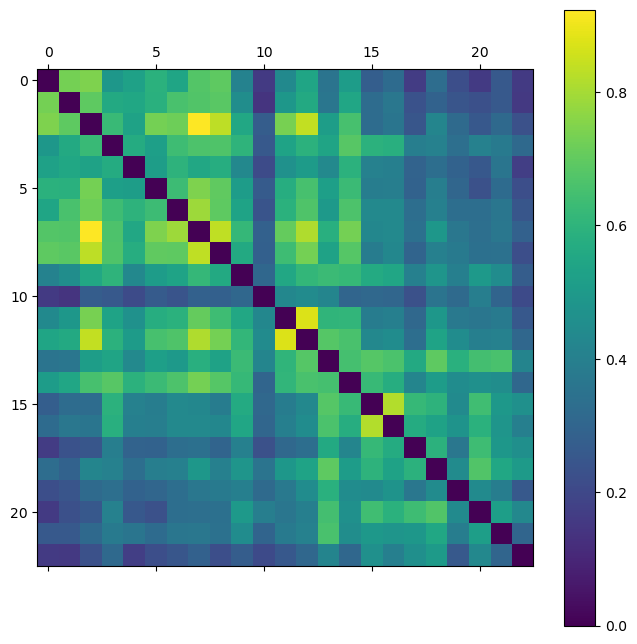

---- Finish saving similarity matrix!


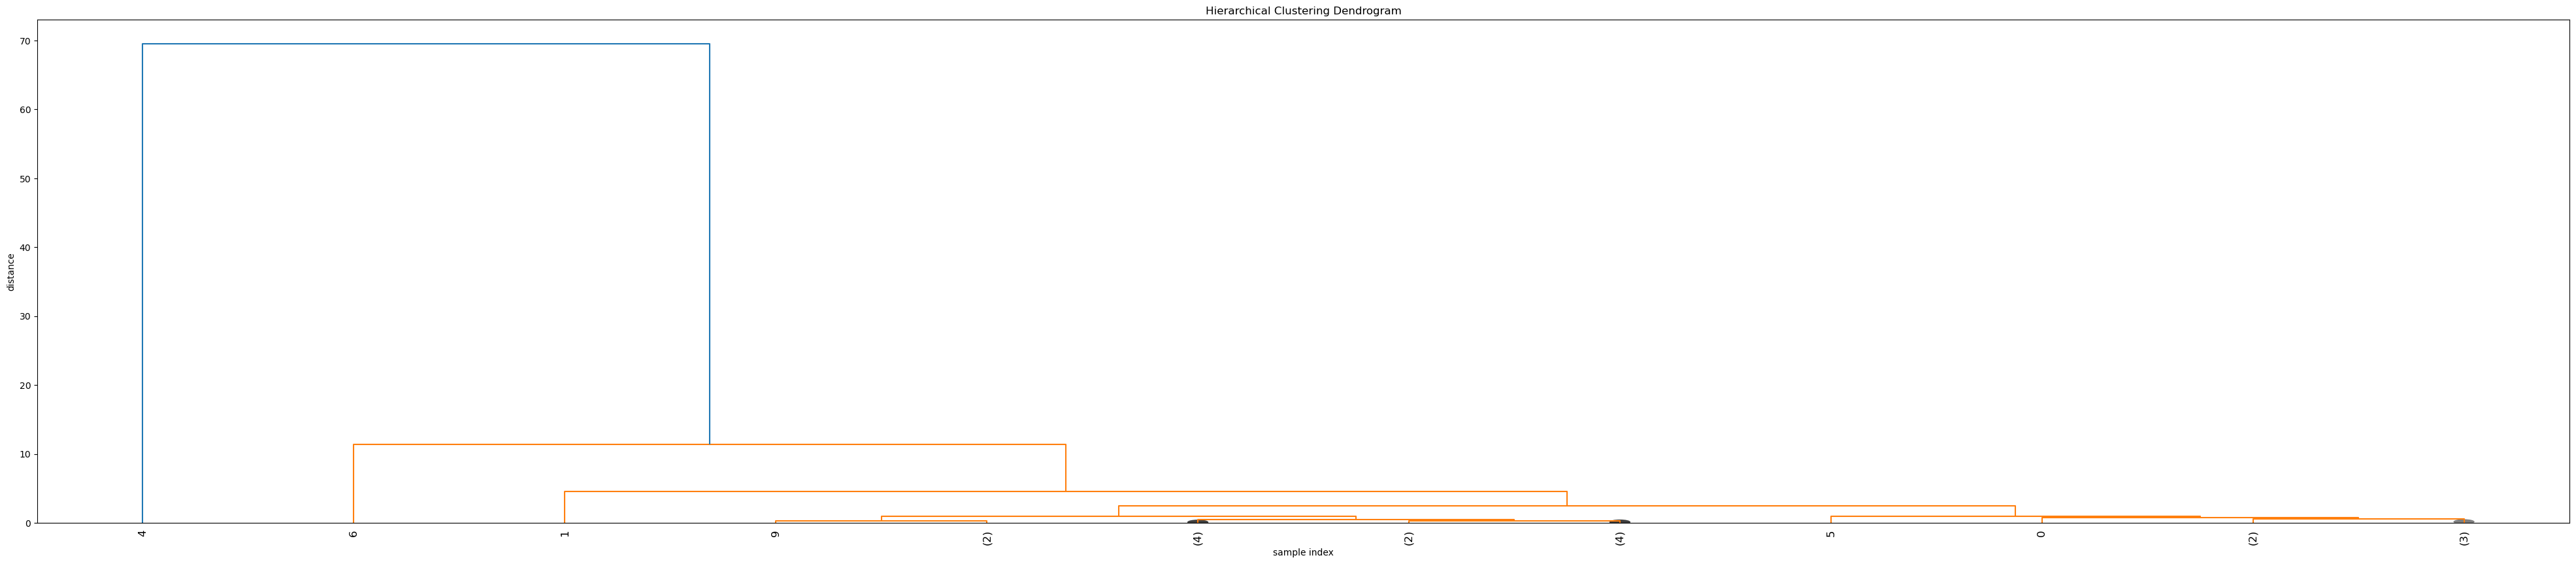

<class 'numpy.ndarray'> 23 [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1 22 [0, 1, 2, 3, 5]
2 1 [4]
similarity: (23, 23)


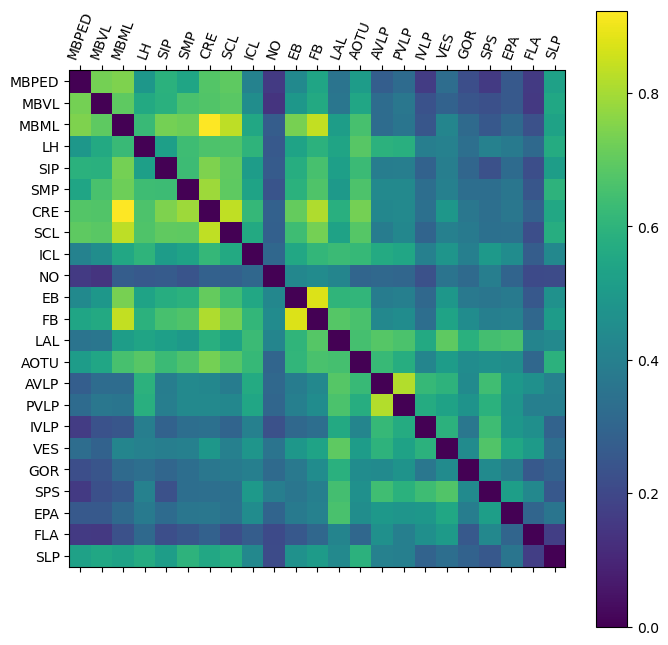

---- Finish saving hierarchy similarity matrix!
-------------- period  1  -------------
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230417-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly3-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230428-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230507-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly3-trans-stimu/
---

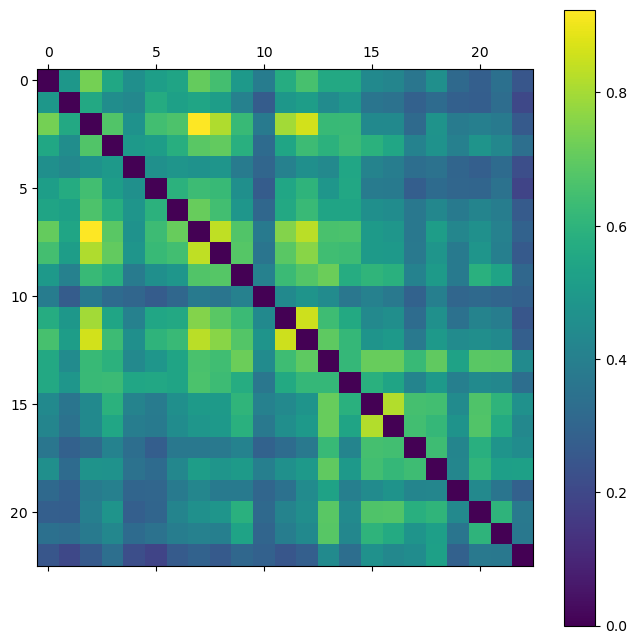

---- Finish saving similarity matrix!


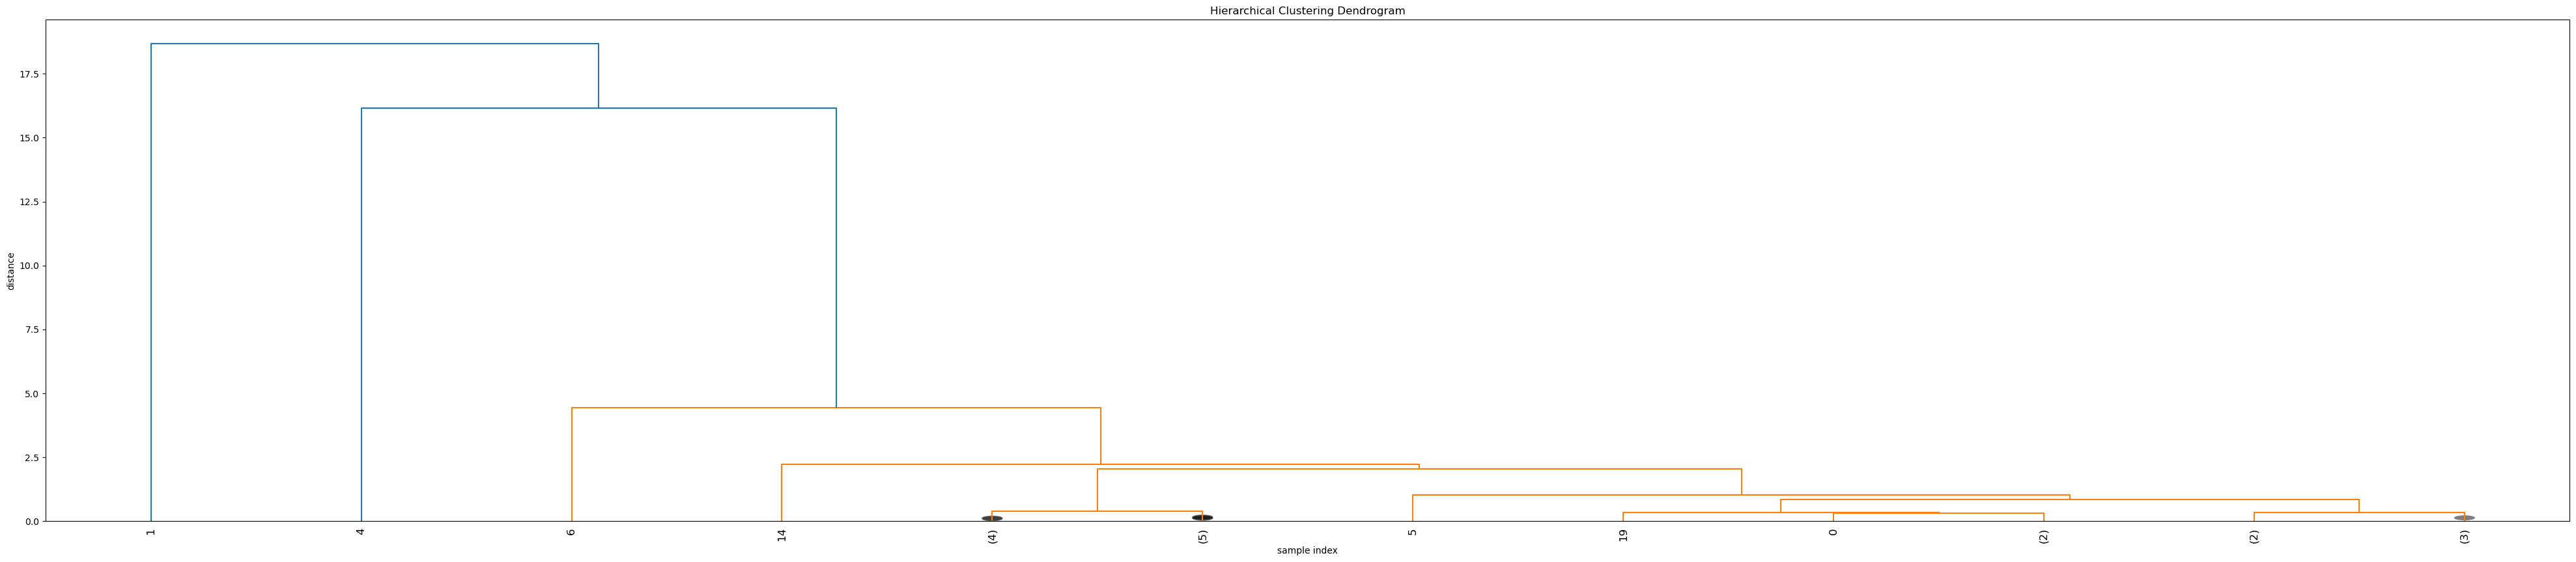

<class 'numpy.ndarray'> 23 [1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1 22 [0, 2, 3, 4, 5]
2 1 [1]
similarity: (23, 23)


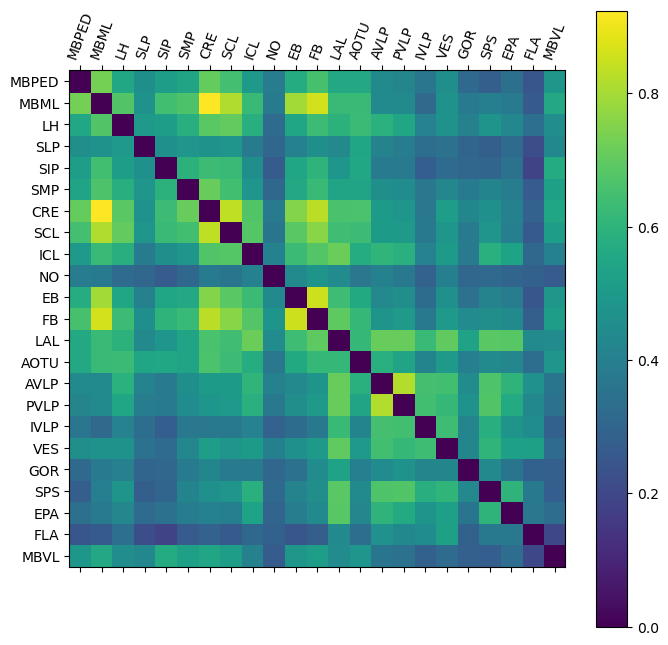

---- Finish saving hierarchy similarity matrix!
-------------- period  2  -------------
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230417-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly3-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230428-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230507-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly3-trans-stimu/
---

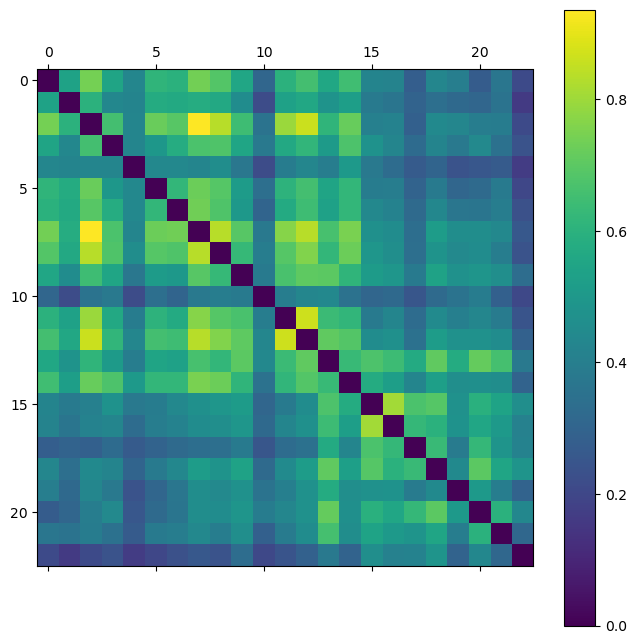

---- Finish saving similarity matrix!


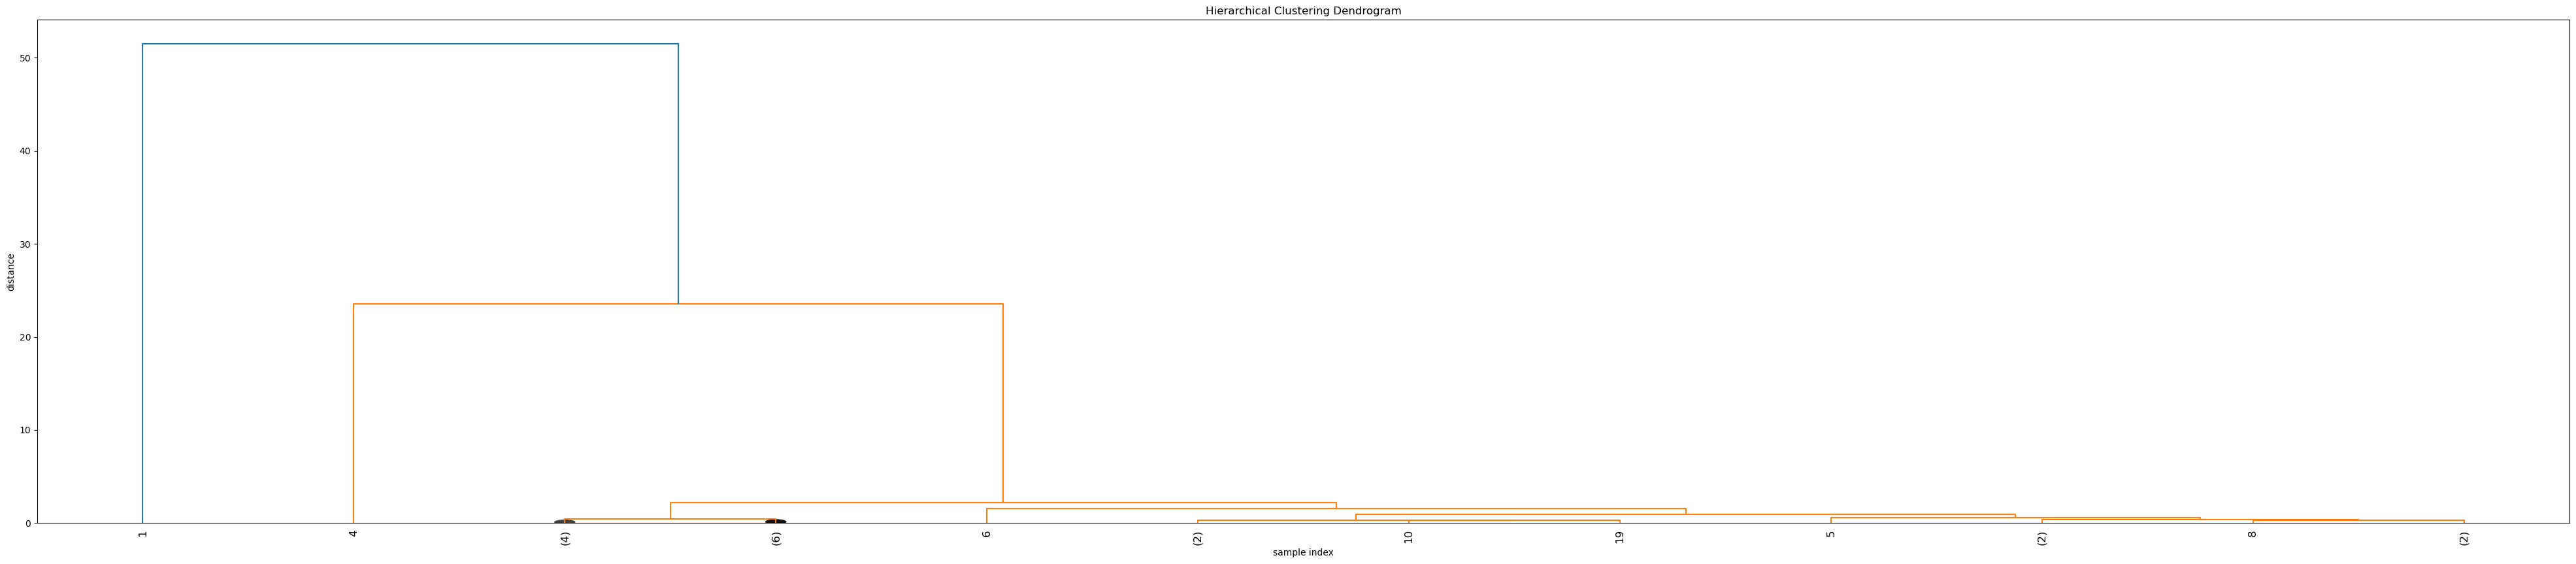

<class 'numpy.ndarray'> 23 [1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1 22 [0, 2, 3, 4, 5]
2 1 [1]
similarity: (23, 23)


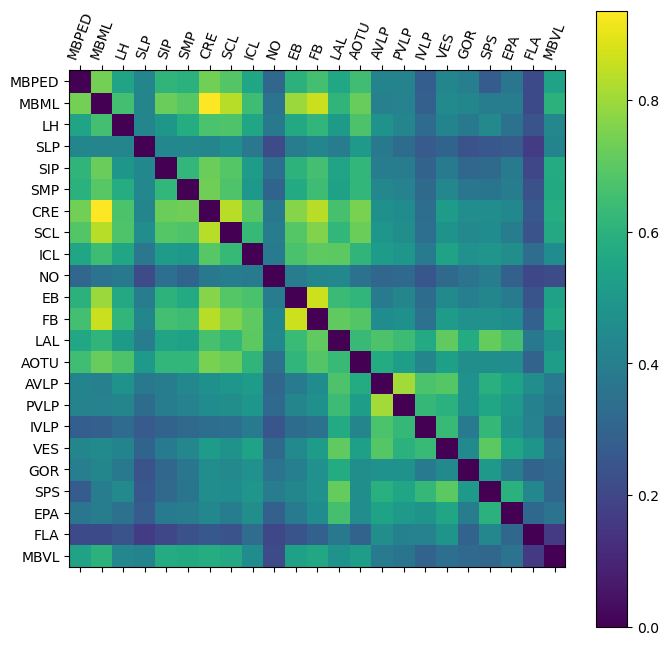

---- Finish saving hierarchy similarity matrix!
-------------- period  3  -------------
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230417-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230420-fly3-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230428-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230507-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230510-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly2-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/Ach-20230511-fly3-trans-stimu/
---

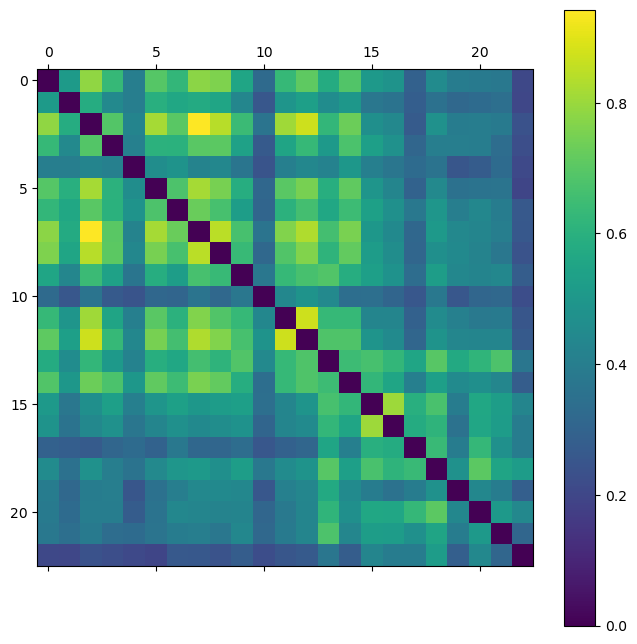

---- Finish saving similarity matrix!


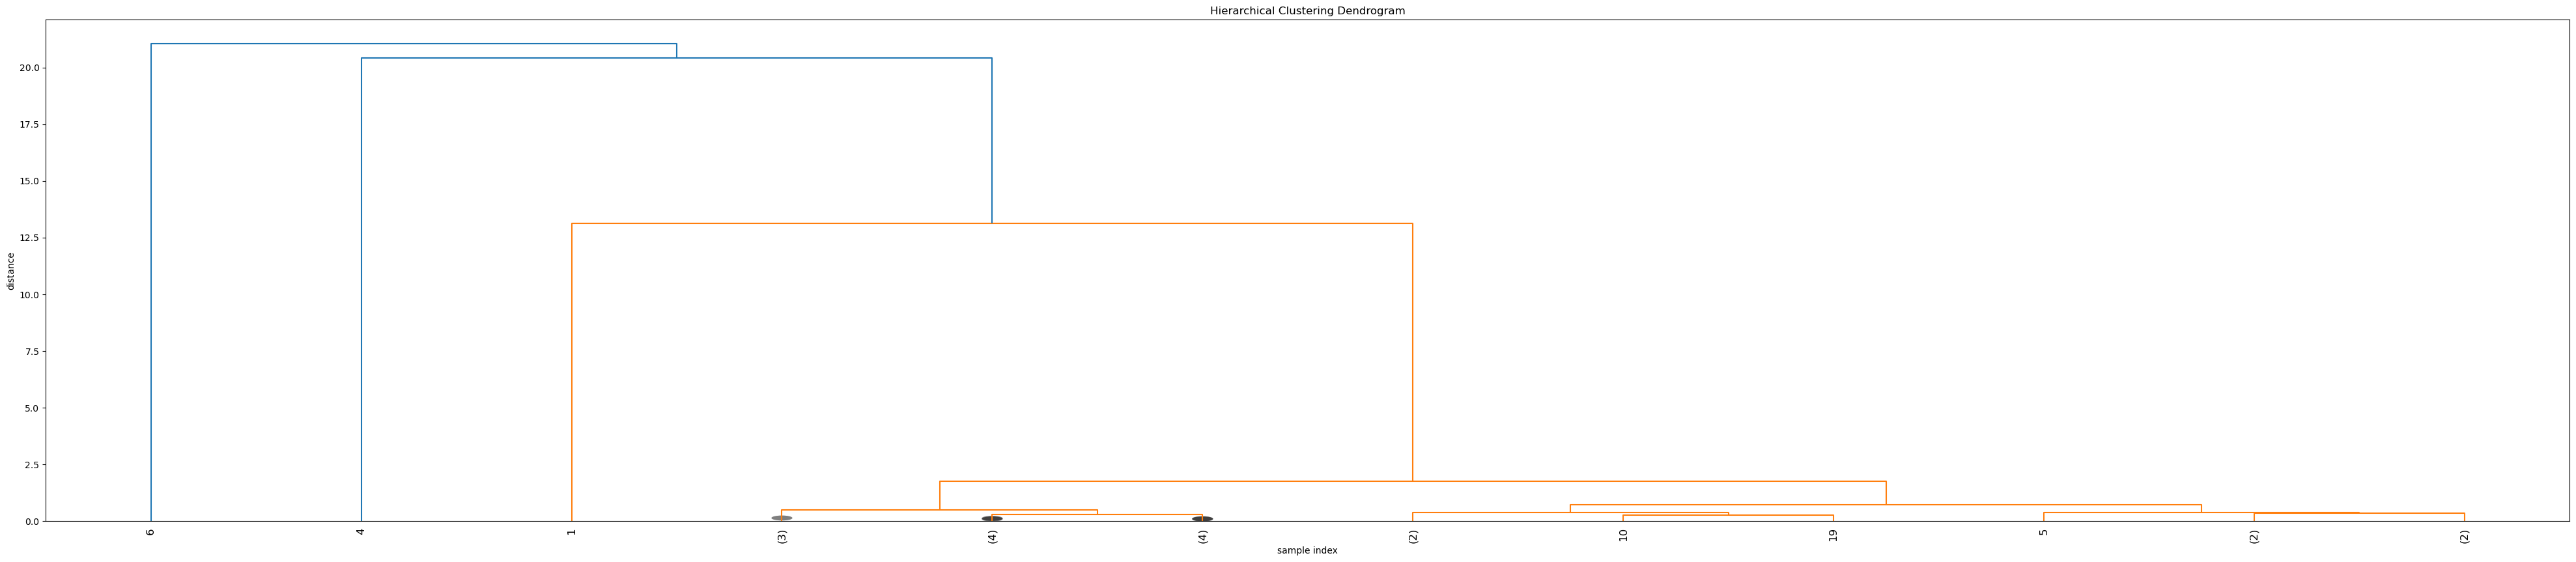

<class 'numpy.ndarray'> 23 [1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1 22 [0, 1, 2, 3, 4]
2 1 [6]
similarity: (23, 23)


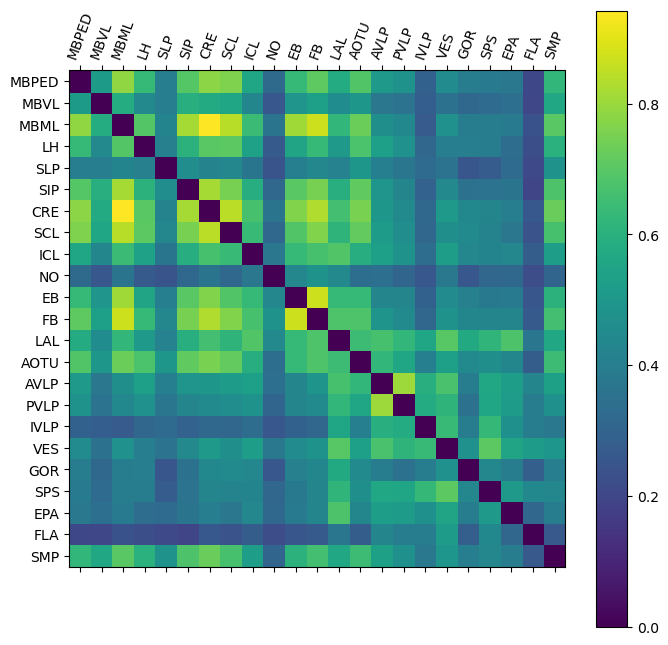

---- Finish saving hierarchy similarity matrix!
END


In [7]:
''' generate average correlation matrix '''

## output path
outpath = path + 'ACh_5HT_average_Stim/'
print("outpath:", outpath)

## setting
data_index_list = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1',
                       '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]
focus_regions_1 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # 80,82
focus_regions_2 = [64,65,66,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # 55,80,82

## parameters
period_cnt = 4
period_trails = 180 / period_cnt
whole_start_timepoint = 3

for period_i in range(period_cnt):
    print('-------------- period ', period_i, ' -------------')
    
    ## initialization
    region_similarity_dict = {}
    n_regions = len(focus_regions_0)
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):   
            region_similarity_dict[(focus_regions_0[i],focus_regions_0[j])] = []
    region_records_avg_dict = {}
    for i in range(n_regions):
        region_records_avg_dict[focus_regions_0[i]] = []

    ## process ACh flies
    for fly_idx in data_index_list:
        inputpath = path + 'flies_ACh/Ach-' + fly_idx + '-trans-stimu/'
        print("---- processing inputpath: ", inputpath)

        region_records_avg = []
        focus_regions = []
        if fly_idx == '20230428-fly1' or fly_idx == '20230510-fly1':
            focus_regions = focus_regions_1
        elif fly_idx == '20230507-fly1':
            focus_regions = focus_regions_2
        else:
            focus_regions = focus_regions_0

        for region_idx in focus_regions:  
            ## load record data
            records = np.load(inputpath +'neuron_concat_records/region_' + str(region_idx) +'_neuron_records.npy',allow_pickle=True)

            ## select records for the given time period
            cnt = 45 * period_i + 1 
            frames = 20
            duration = 23
            start_timepoint = whole_start_timepoint
            pre_sti = records[:, start_timepoint : start_timepoint + frames]
            start_timepoint += duration
            len_max = len(records[0])
            while cnt < 45 * (period_i + 1):
                cnt += 1
                pre_sti = np.concatenate((pre_sti,records[:, start_timepoint : start_timepoint + frames]), axis = 1) 
                start_timepoint += duration     

            ## generate average records
            pre_sti_avg = np.mean(pre_sti, axis = 0)

            region_records_avg.append(pre_sti_avg)
            region_records_avg_dict[region_idx].append(pre_sti_avg)

        ## calculate correlation
        n_regions_new = len(focus_regions)
        for i in range(n_regions_new - 1):
            for j in range(i + 1, n_regions_new):   
                pearson = pearsonr(region_records_avg[i], region_records_avg[j])
                pair = (focus_regions[i], focus_regions[j])
                region_similarity_dict[pair].append(pearson[0])

    whole_start_timepoint = start_timepoint

    '''
    calculate correlation matrix
    '''
    similarity = np.zeros((n_regions, n_regions))
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):   
            similarity[i,j] = similarity[j,i] = np.mean(region_similarity_dict[(focus_regions_0[i],focus_regions_0[j])])
    np.save(outpath + 'whole_brain_all_regions_similarity_ACH_preiod' + str(period_i) + '.npy', similarity)
    print("similarity:", similarity.shape)

    figure = plt.figure(figsize=(8,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(similarity, interpolation ='nearest') 
    figure.colorbar(caxes) 
    plt.savefig(outpath + 'whole_brain_all_regions_similarity_ACH_preiod' + str(period_i) + '.png')
    plt.show()
    print("---- Finish saving similarity matrix!")

    '''
    calculate hierarchy clustering
    '''
    region_records_avg_list = []
    for i in range(n_regions):
        records_avg = np.mean(region_records_avg_dict[focus_regions_0[i]], axis = 0)
        region_records_avg_list.append(records_avg) 
    np.save(outpath + 'whole_brain_all_regions_records_avg_ACH_preiod' + str(period_i) + '.npy', region_records_avg_list)

    ## clusters
    Z = linkage(region_records_avg_list, 'ward') 
    plt.figure(figsize=(50, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.show()

    k = 2
    clusters = fcluster(Z, k, criterion='maxclust')
    print(type(clusters), len(clusters), clusters) 
    list(enumerate(clusters))
    hierarchy_idx = []
    hierarchy_region = []
    for index_id in range(1,k+1):
        index = [i for i,j in enumerate(clusters) if j == index_id]
        print(index_id, len(index), index[:5])
        hierarchy_idx.append(index)   
        hierarchy_region += list(np.array(focus_regions_0)[index])

    ## new region order
    hierarchy_region_name = []
    for i in hierarchy_region:
        hierarchy_region_name.append(region_names[i])
    hierarchy_idx_list = list(chain(*hierarchy_idx))

    ## calculate hierarchy simularity
    similarity = np.zeros((n_regions, n_regions))
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):   
            pair = (hierarchy_region[i],hierarchy_region[j])
            if pair not in region_similarity_dict.keys():
                pair = (hierarchy_region[j],hierarchy_region[i])
            similarity[i,j] = similarity[j,i] = np.mean(region_similarity_dict[pair])
    print("similarity:", similarity.shape)

    ## plot
    figure = plt.figure(figsize=(8,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(similarity, interpolation ='nearest') 
    figure.colorbar(caxes) 
    plt.xticks(rotation = 70)
    plt.xticks(range(len(hierarchy_region)), hierarchy_region_name)
    plt.yticks(rotation = 0)
    plt.yticks(range(len(hierarchy_region)), hierarchy_region_name)
    plt.savefig(outpath + 'whole_brain_all_regions_similarity_hierarchy_ACH_preiod' + str(period_i) + '.png')
    plt.show()

    hierarchy_idx_dict = {}
    for k in range(len(hierarchy_idx)):
        hierarchy_idx_dict[k] = hierarchy_idx[k]
    np.save(outpath + 'whole_brain_all_regions_similarity_hierarchy_ACH_idx_preiod' + str(period_i) + '.npy', hierarchy_idx_dict)
    np.save(outpath + 'whole_brain_all_regions_similarity_hierarchy_ACH_preiod' + str(period_i) + '.npy', similarity)
    print("---- Finish saving hierarchy similarity matrix!")


print("END")

In [23]:
''' generate average network and communities '''

## parameters
delete_seg = 0
period_cnt = 4

for period_i in range(period_cnt):
    ## load data
    load_path = path + 'ACh_5HT_average_Stim/'
    similarity = np.load(load_path + 'whole_brain_all_regions_similarity_ACH_preiod' + str(period_i) + '.npy')
    print("similarity:", similarity.shape)

    ## collect nodes and edges
    n_neurons = len(similarity)
    nodes = [i for i in range(n_neurons)]
    edges = {}
    for i in range(n_neurons - 1):
        for j in range(i + 1, n_neurons):   
            edges[(i,j)] = similarity[i,j]

    ## keep only correlations with high positive values 
    weighted_edges_list = []
    for v in edges.values():
        weighted_edges_list.append(v)
    weighted_edges_list.sort()
    threshold = weighted_edges_list[int(delete_seg * len(weighted_edges_list))]

    ## generate network from correlation matrix
    source, target, weight = [], [], []
    selected_edges = []
    for k,v in edges.items():
        if np.mean(v) < threshold:
            continue
        source.append(int(k[0]))
        target.append(int(k[1]))
        weight.append(np.round(v,4))
        selected_edges.append((int(k[0]), int(k[1]), np.round(v,4)))

    ## save network into csv files
    save_data_calc = {"source": source, "target": target, "weight": weight}
    df = pd.DataFrame(save_data_calc)
    df.to_csv(load_path + 'whole_brain_network_edges' + str(round(1 - delete_seg, 1)) + '_ACH_preiod' + str(period_i) + '.csv', index=False)

print("END")

similarity: (23, 23)
# nodes: 23  # n_edges: 253
louvain communities: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14}, {10, 13, 15, 16, 17, 18, 19, 20, 21, 22}]
greedy modularity communities: [frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14}), frozenset({10, 13, 15, 16, 17, 18, 19, 20, 21, 22})]
END


In [8]:
''' calculate network statistics '''

## parameters
delete_seg = 0
nodes = [i for i in range(23)]

for period_i in range(4):
    calc_path = path + 'ACh_5HT_average_Stim\\'
    similarity = np.load(calc_path + 'whole_brain_all_regions_similarity_ACH_preiod' + str(period_i) + '.npy')
    similarity_fla = similarity.flatten()

    ## edges
    similarity_fla.sort()
    threshold = similarity_fla[int(delete_seg * len(similarity_fla))]
    weighted_edges = [] 
    for i in range(len(similarity) - 1):
        for j in range(i + 1, len(similarity)):
            wei = np.round(similarity[i,j],4)
            if wei < threshold:
                continue
            weighted_edges.append(np.array([i,j,wei]))

    ## generate network
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges)

    ## network stats
    degree_assortativity = nx.degree_assortativity_coefficient(G)
    avg_clustering = nx.average_clustering(G)
    avg_shortest_path = 0
    diameter = 0
    try:
        avg_shortest_path = nx.average_shortest_path_length(G)
        diameter = nx.diameter(G)
    except:
        print('G is not connected!')
    density = nx.density(G)
    transitivity = nx.transitivity(G)
    d = dict(nx.degree(G))
    avg_degree = sum(d.values())/G.number_of_nodes()
    node_degrees = [round(i[1],3) for i in nx.degree(G,weight="weight")]
    node_degrees_avg = np.mean(node_degrees)
    node_degrees.sort(reverse = True)

    degree_centrality = [round(i,3) for i in nx.degree_centrality(G).values()]
    degree_centrality_avg = np.mean(degree_centrality)
    degree_centrality.sort(reverse = True)

    closeness_centrality = [round(i,3) for i in nx.closeness_centrality(G).values()]
    closeness_centrality_avg = np.mean(closeness_centrality)
    closeness_centrality.sort(reverse = True)

    betweenness_centrality = [round(i,3) for i in nx.betweenness_centrality(G).values()]
    betweenness_centrality_avg = np.mean(betweenness_centrality)
    betweenness_centrality.sort(reverse = True)
    
    ## save stats into file
    writer = pd.ExcelWriter(calc_path +'whole_brain_network_edges' + str(round(1 - delete_seg, 1)) + '_stat_ACH_preiod' + str(period_i) + '.xlsx')
    data_dict = {}
    data_dict["stats"] = ["nodes", "edges", "degree_assortativity", "avg_clustering", "avg_shortest_path", "density", "diameter", "transitivity", "avg_degree",
           "n_degrees_mean", "n_degrees_mean_avg", "n_avg_degree_centrality", "n_avg_closeness_centrality", "n_avg_betweenness_centrality",
            "n_degrees", "n_degree_centrality", "n_closeness_centrality",  "n_betweenness_centrality"]
    data_dict["calc"] = [n_nodes, n_edges, round(degree_assortativity,3),round(avg_clustering,3),round(avg_shortest_path,3), round(density,3),
                        diameter, round(transitivity,3), round(avg_degree,3),
                        node_degrees_avg, round(node_degrees_avg/n_nodes,3), degree_centrality_avg,
                        closeness_centrality_avg, betweenness_centrality_avg, 
                        node_degrees, degree_centrality, closeness_centrality, betweenness_centrality]
    df = pd.DataFrame(data_dict)
    df.to_excel(writer, sheet_name = "stat", index = False)        
    writer.save()
    
print("END")

END


## Generate average 5HT network over 10 5HT-flies

outpath: /0-LLB/New_data/data_analysis_res_deepcad/Ach-all-flies-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/20230429-r5HT1.0-fly1-trans-stimu/
---- processing inputpath:  /0-LLB/New_data/data_analysis_res_deepcad/20230506-r5HT1.0-fly1-trans-stimu/
similarity: (23, 23)


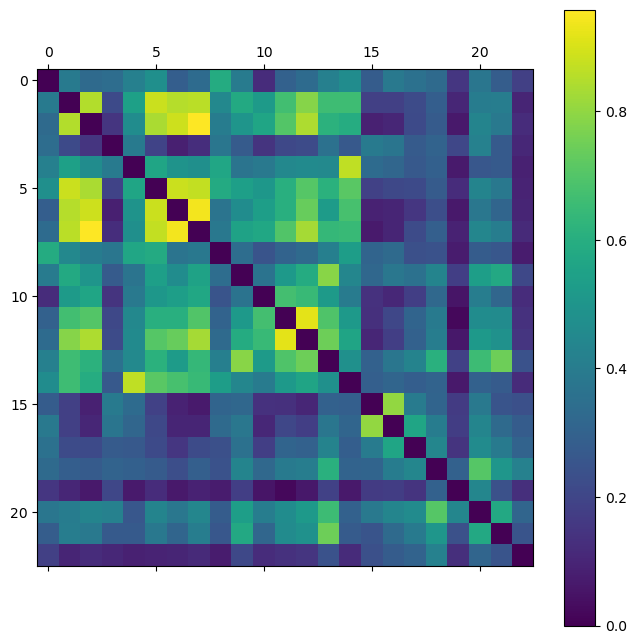

---- Finish saving similarity matrix!


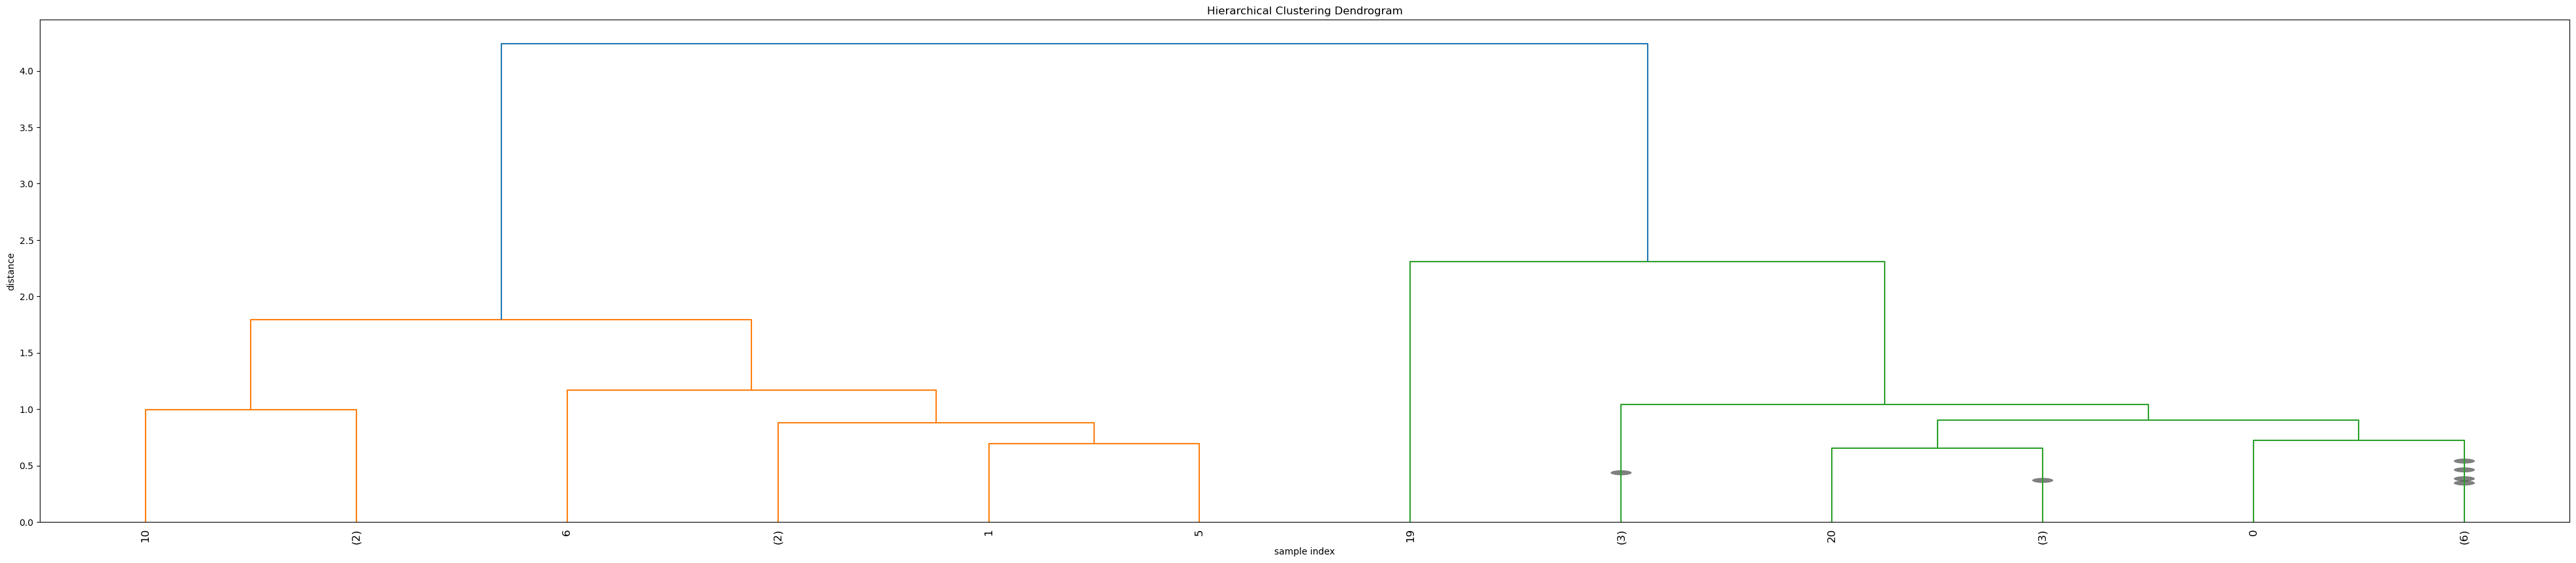

clusters: <class 'numpy.ndarray'> 23 [2 1 1 2 2 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2]
hierarchy region name: 23 ['MBVL', 'MBML', 'SIP', 'SMP', 'CRE', 'NO', 'EB', 'FB', 'MBPED', 'LH', 'SLP', 'SCL', 'ICL', 'LAL', 'AOTU', 'AVLP', 'PVLP', 'IVLP', 'VES', 'GOR', 'SPS', 'EPA', 'FLA']
hierarchy similarity: (23, 23)


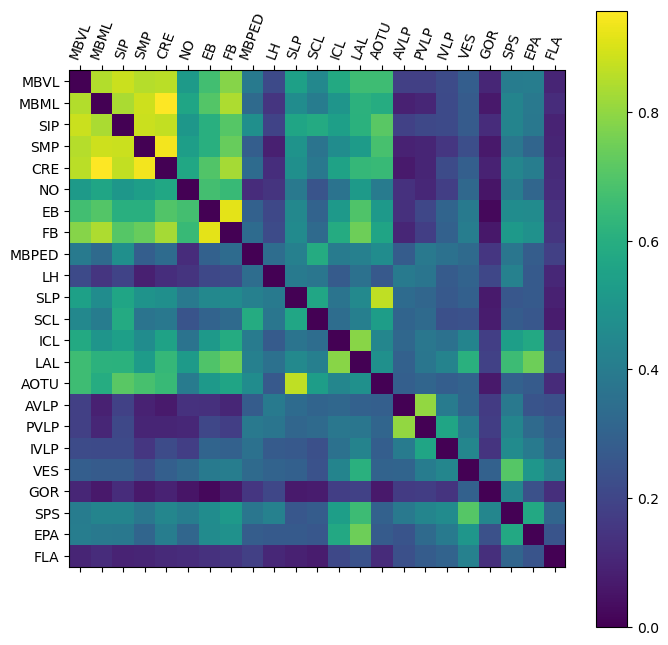

---- Finish saving hierarchy similarity matrix!
END


In [26]:
''' generate average correlation matrix '''

## output path
outpath = path + 'ACh_5HT_average_Stim/'
print("outpath:", outpath)

## settings
data_index_list = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', 
                       '20230513-r5HT1.0-fly2', '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4',
                       '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
focus_regions_0 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67]
focus_regions_1 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,85,67] # 82
focus_regions_2 = [64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,85,67] # 80,82
focus_regions_3 = [64,65,66,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67] # 55

## parameters
period_cnt = 4
period_trails = 180 / period_cnt
whole_start_timepoint = 3

for period_i in range(period_cnt):
    print('-------------- period ', period_i, ' -------------')
    
    ## initialization
    region_similarity_dict = {}
    n_regions = len(focus_regions_0)
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):   
            region_similarity_dict[(focus_regions_0[i],focus_regions_0[j])] = []
    region_records_avg_dict = {}
    for i in range(n_regions):
        region_records_avg_dict[focus_regions_0[i]] = []

    ## process 5HT flies
    for fly_idx in data_index_list:
        inputpath = path + 'flies_5HT/' + fly_idx + '-trans-stimu/'
        print("---- processing inputpath: ", inputpath)

        region_records_avg = []
        focus_regions = []
        if fly_idx in ["20230429-r5HT1.0-fly1", "20230516-r5HT1.0-fly4"]:
            focus_regions = focus_regions_1
        elif fly_idx in ["20230601-r5HT1.0-fly3", "20230517-r5HT1.0-fly1"]:
            focus_regions = focus_regions_2
        elif fly_idx == "20230601-r5HT1.0-fly1":
            focus_regions = focus_regions_3
        else:
            focus_regions = focus_regions_0

        for region_idx in focus_regions:   
            ## load record data
            records = np.load(inputpath +'neuron_concat_records/region_' + str(region_idx) +'_neuron_records.npy',allow_pickle=True)

            ## select records for the given time period
            cnt = 45 * period_i + 1 
            frames = 20 
            duration = 23
            start_timepoint = whole_start_timepoint
            pre_sti = records[:, start_timepoint : start_timepoint + frames]
            start_timepoint += duration
            len_max = len(records[0])
            while cnt < 45 * (period_i + 1):
                cnt += 1
                pre_sti = np.concatenate((pre_sti,records[:, start_timepoint : start_timepoint + frames]), axis = 1) 
                start_timepoint += duration 

            ## generate average records
            pre_sti_avg = np.mean(pre_sti, axis = 0)

            region_records_avg.append(pre_sti_avg)
            region_records_avg_dict[region_idx].append(pre_sti_avg)
            
        ## calculate correlation
        n_regions_new = len(focus_regions)
        for i in range(n_regions_new - 1):
            for j in range(i + 1, n_regions_new):   
                pearson = pearsonr(region_records_avg[i], region_records_avg[j])
                pair = (focus_regions[i], focus_regions[j])
                region_similarity_dict[pair].append(pearson[0])

    whole_start_timepoint = start_timepoint

    '''
    calculate correlation matrix
    '''
    similarity = np.zeros((n_regions, n_regions))
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):   
            similarity[i,j] = similarity[j,i] = np.mean(region_similarity_dict[(focus_regions_0[i],focus_regions_0[j])])
    np.save(outpath + 'whole_brain_all_regions_similarity_5HT_preiod' + str(period_i) + '.npy', similarity)
    print("similarity:", similarity.shape)

    figure = plt.figure(figsize=(8,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(similarity, interpolation ='nearest') 
    figure.colorbar(caxes) 
    plt.savefig(outpath + 'whole_brain_all_regions_similarity_5HT_preiod' + str(period_i) + '.png')
    plt.show()

    print("---- Finish saving similarity matrix!")

    '''
    calculate hierarchy clustering
    '''
    region_records_avg_list = []
    for i in range(n_regions):
        records_avg = np.mean(region_records_avg_dict[focus_regions_0[i]], axis = 0)
        region_records_avg_list.append(records_avg) 
    np.save(outpath + 'whole_brain_all_regions_records_avg_5HT_preiod' + str(period_i) + '.npy', region_records_avg_list)

    ## clusters
    Z = linkage(region_records_avg_list, 'ward') 
    plt.figure(figsize=(50, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.show()

    k = 2
    clusters = fcluster(Z, k, criterion='maxclust')
    print(type(clusters), len(clusters), clusters)    
    list(enumerate(clusters))
    hierarchy_idx = []
    hierarchy_region = []
    for index_id in range(1,k+1):
        index = [i for i,j in enumerate(clusters) if j == index_id]
        print(index_id, len(index), index[:5])
        hierarchy_idx.append(index)   
        hierarchy_region += list(np.array(focus_regions_0)[index])

    ## new region order
    hierarchy_region_name = []
    for i in hierarchy_region:
        hierarchy_region_name.append(region_names[i])
    hierarchy_idx_list = list(chain(*hierarchy_idx))
    print("hierarchy_idx_list:", len(hierarchy_idx_list), hierarchy_idx_list)
    print("hierarchy_region:", len(hierarchy_region), hierarchy_region)
    print("hierarchy_region_name:", len(hierarchy_region_name), hierarchy_region_name)

    ## calculate hierarchy simularity
    similarity = np.zeros((n_regions, n_regions))
    for i in range(n_regions - 1):
        for j in range(i + 1, n_regions):   
            pair = (hierarchy_region[i],hierarchy_region[j])
            if pair not in region_similarity_dict.keys():
                pair = (hierarchy_region[j],hierarchy_region[i])
            similarity[i,j] = similarity[j,i] = np.mean(region_similarity_dict[pair])
    print("similarity:", similarity.shape)

    ## plot
    figure = plt.figure(figsize=(8,8)) 
    axes = figure.add_subplot(111) 
    caxes = axes.matshow(similarity, interpolation ='nearest') 
    figure.colorbar(caxes) 
    plt.xticks(rotation = 70)
    plt.xticks(range(len(hierarchy_region)), hierarchy_region_name)
    plt.yticks(rotation = 0)
    plt.yticks(range(len(hierarchy_region)), hierarchy_region_name)
    plt.savefig(outpath + 'whole_brain_all_regions_similarity_hierarchy_5HT_preiod' + str(period_i) + '.png')
    plt.show()

    hierarchy_idx_dict = {}
    for k in range(len(hierarchy_idx)):
        hierarchy_idx_dict[k] = hierarchy_idx[k]
    np.save(outpath + 'whole_brain_all_regions_similarity_hierarchy_5HT_idx_preiod' + str(period_i) + '.npy', hierarchy_idx_dict)
    np.save(outpath + 'whole_brain_all_regions_similarity_hierarchy_5HT_preiod' + str(period_i) + '.npy', similarity)
    print("---- Finish saving hierarchy similarity matrix!")
    
print("END")

In [27]:
''' generate average network and communities '''

## parameters
delete_seg = 0
period_cnt = 4

for period_i in range(period_cnt):
    ## load data
    load_path = path + 'ACh_5HT_average_Stim/'
    similarity = np.load(load_path + 'whole_brain_all_regions_similarity_5HT_preiod' + str(period_i) + '.npy')
    print("similarity:", similarity.shape)

    ## collect nodes and edges
    n_neurons = len(similarity)
    nodes = [i for i in range(n_neurons)]
    edges = {}
    for i in range(n_neurons - 1):
        for j in range(i + 1, n_neurons):   
            edges[(i,j)] = similarity[i,j]

    ## keep only correlations with high positive values 
    weighted_edges_list = []
    for v in edges.values():
        weighted_edges_list.append(v)
    weighted_edges_list.sort()
    threshold = weighted_edges_list[int(delete_seg * len(weighted_edges_list))]

    ## generate network from correlation matrix
    source, target, weight = [], [], []
    selected_edges = []
    for k,v in edges.items():
        if np.mean(v) < threshold:
            continue
        source.append(int(k[0]))
        target.append(int(k[1]))
        weight.append(np.round(v,4))
        selected_edges.append((int(k[0]), int(k[1]), np.round(v,4)))

    ## save network into csv files
    save_data_calc = {"source": source, "target": target, "weight": weight}
    df = pd.DataFrame(save_data_calc)
    df.to_csv(load_path + 'whole_brain_network_edges' + str(round(1 - delete_seg, 1)) + '_5HT_preiod' + str(period_i) + '.csv', index=False)

print("END")

similarity: (23, 23)
# nodes: 23  # n_edges: 253
louvain communities: [{1, 2, 4, 5, 6, 7, 10, 11, 12, 14}, {0, 3, 8, 9, 13, 15, 16, 17, 18, 19, 20, 21, 22}]
greedy modularity communities: [frozenset({0, 3, 8, 9, 13, 15, 16, 17, 18, 19, 20, 21, 22}), frozenset({1, 2, 4, 5, 6, 7, 10, 11, 12, 14})]
END


In [9]:
''' calculate network statistics '''

## parameters
delete_seg = 0
nodes = [i for i in range(23)]

for period_i in range(4):
    calc_path = path + 'ACh_5HT_average_Stim\\'
    similarity = np.load(calc_path + 'whole_brain_all_regions_similarity_5HT_preiod' + str(period_i) + '.npy')
    similarity_fla = similarity.flatten()

    ## edges
    similarity_fla.sort()
    threshold = similarity_fla[int(delete_seg * len(similarity_fla))]
    weighted_edges = [] 
    for i in range(len(similarity) - 1):
        for j in range(i + 1, len(similarity)):
            wei = np.round(similarity[i,j],4)
            if wei < threshold:
                continue
            weighted_edges.append(np.array([i,j,wei]))

    ## generate network
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges)

    ## network stats
    degree_assortativity = nx.degree_assortativity_coefficient(G)
    avg_clustering = nx.average_clustering(G)
    avg_shortest_path = 0
    diameter = 0
    try:
        avg_shortest_path = nx.average_shortest_path_length(G)
        diameter = nx.diameter(G)
    except:
        print('G is not connected!')
    density = nx.density(G)
    transitivity = nx.transitivity(G)
    d = dict(nx.degree(G))
    avg_degree = sum(d.values())/G.number_of_nodes()
    node_degrees = [round(i[1],3) for i in nx.degree(G,weight="weight")]
    node_degrees_avg = np.mean(node_degrees)
    node_degrees.sort(reverse = True)

    degree_centrality = [round(i,3) for i in nx.degree_centrality(G).values()]
    degree_centrality_avg = np.mean(degree_centrality)
    degree_centrality.sort(reverse = True)

    closeness_centrality = [round(i,3) for i in nx.closeness_centrality(G).values()]
    closeness_centrality_avg = np.mean(closeness_centrality)
    closeness_centrality.sort(reverse = True)

    betweenness_centrality = [round(i,3) for i in nx.betweenness_centrality(G).values()]
    betweenness_centrality_avg = np.mean(betweenness_centrality)
    betweenness_centrality.sort(reverse = True)
    
    ## save stats into file
    writer = pd.ExcelWriter(calc_path +'whole_brain_network_edges' + str(round(1 - delete_seg, 1)) + '_stat_5HT_preiod' + str(period_i) + '.xlsx')
    data_dict = {}
    data_dict["stats"] = ["nodes", "edges", "degree_assortativity", "avg_clustering", "avg_shortest_path", "density", "diameter", "transitivity", "avg_degree",
           "n_degrees_mean", "n_degrees_mean_avg", "n_avg_degree_centrality", "n_avg_closeness_centrality", "n_avg_betweenness_centrality",
            "n_degrees", "n_degree_centrality", "n_closeness_centrality",  "n_betweenness_centrality"]
    data_dict["calc"] = [n_nodes, n_edges, round(degree_assortativity,3),round(avg_clustering,3),round(avg_shortest_path,3), round(density,3),
                        diameter, round(transitivity,3), round(avg_degree,3),
                        node_degrees_avg, round(node_degrees_avg/n_nodes,3), degree_centrality_avg,
                        closeness_centrality_avg, betweenness_centrality_avg, 
                        node_degrees, degree_centrality, closeness_centrality, betweenness_centrality]
    df = pd.DataFrame(data_dict)
    df.to_excel(writer, sheet_name = "stat", index = False)        
    writer.save()
    
print("END")

END
